In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fake = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake.csv")
df_true = pd.read_csv("/content/drive/My Drive/Colab Notebooks/True.csv")
df_fake["label"] = 0
df_true["label"] = 1

In [ ]:
df = pd.concat([df_fake, df_true], axis =0 )

df = df.drop_duplicates(subset=['title'])
df = df.drop(["subject","date","text"], axis = 1)
print(df['label'].value_counts())

label
1    20826
0    17903
Name: count, dtype: int64


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,title,label
0,Supreme Court Justice Ginsburg 'regrets' Trump...,1
1,DOZENS Of GOP Foreign Policy Experts Pledge T...,0
2,REPORT: Trump Laughed After Woman Was Grabbed...,0
3,"In North Dakota, Trump finds Democrat willing ...",1
4,"Flash floods kill five in Malaysia, army deplo...",1
...,...,...
38724,Oklahoma Republicans Are Trying To Impeach Ob...,0
38725,THE HORRIBLE END GAME: BERNIE SANDERS Calls fo...,0
38726,France overseas minister says two killed in Fr...,1
38727,Trump Stole An Idea From North Korean Propaga...,0


In [ ]:
def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)
df['len']=df["title"].apply(count_words)
df.describe()

,label,len
count,38729.000000,38729.000000
mean,0.537737,12.615327
std,0.498580,3.957209
min,0.000000,1.000000
25%,0.000000,10.000000
50%,1.000000,12.000000
75%,1.000000,14.000000
max,1.000000,45.000000


In [ ]:

df=df.drop(df[df['len'] == 0].index)
df=df.reset_index(drop=True)
df

,title,label,len
0,Supreme Court Justice Ginsburg 'regrets' Trump...,1,7
1,DOZENS Of GOP Foreign Policy Experts Pledge T...,0,13
2,REPORT: Trump Laughed After Woman Was Grabbed...,0,14
3,"In North Dakota, Trump finds Democrat willing ...",1,11
4,"Flash floods kill five in Malaysia, army deplo...",1,13
...,...,...,...
38724,Oklahoma Republicans Are Trying To Impeach Ob...,0,12
38725,THE HORRIBLE END GAME: BERNIE SANDERS Calls fo...,0,15
38726,France overseas minister says two killed in Fr...,1,12
38727,Trump Stole An Idea From North Korean Propaga...,0,16


38644

In [ ]:
print( (df['len'] < 46).sum()/df.shape[0])

1.0


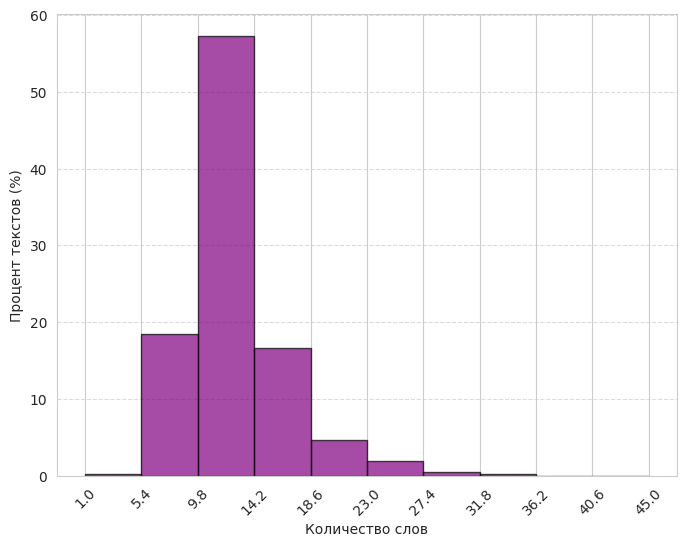

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Кол-во бинов по 100 символов
max_len = df['len'].max()
bins = range(0, int(max_len) + 10, 10)  # шаг 100

# Построим гистограмму и получим значения
n, bins, patches = plt.hist(
    df['len'],

    edgecolor='black',
    color='purple',
    alpha=0.7,
    weights=[100 / len(df)] * len(df)  # Преобразуем в проценты
)


plt.xlabel('Количество слов')
plt.ylabel('Процент текстов (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(bins, rotation=45)
plt.show()


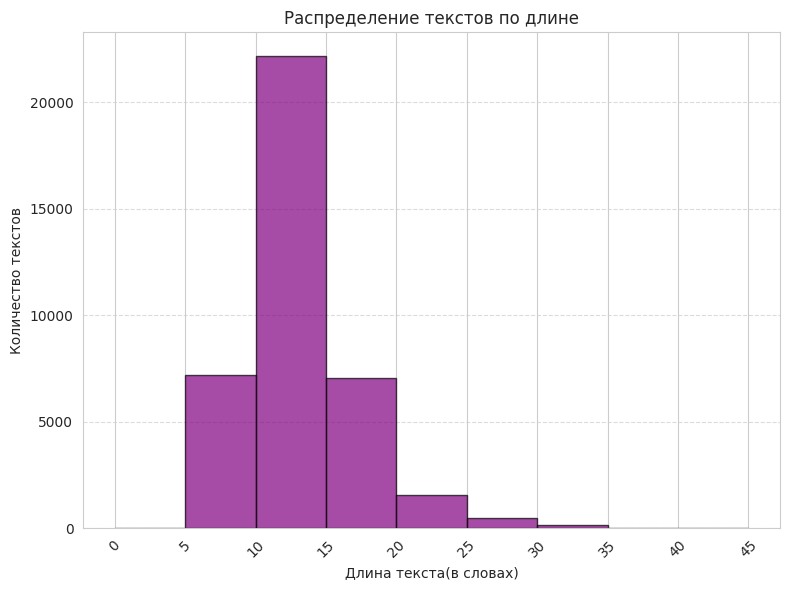

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Максимальная длина слова
max_len = df['len'].max()
bins = range(0, int(max_len) + 2, 5)  # шаг 1, чтобы считать каждую длину слова отдельно

# Строим гистограмму
n, bins, patches = plt.hist(
    df['len'],
    bins=bins,
    edgecolor='black',
    color='purple',
    alpha=0.7
)

plt.xlabel('Длина текста(в словах)')
plt.ylabel('Количество текстов')
plt.title('Распределение текстов по длине')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('watch:', '', text)
    text = re.sub('breaking:', '', text)
    text = re.sub('just in:', '', text)
    text = re.sub('report:', '', text)
    text = re.sub('breaking news:', '', text)
    text = re.sub('flashback:', '', text)
    text = re.sub('busted:', '', text)
    text = re.sub('bombshell:', '', text)
    text = re.sub('sunday screening:', '', text)
    text = re.sub('update:', '', text)
    text = re.sub('revealed:', '', text)
    text = re.sub('not kidding:', '', text)

    text = re.sub('video:', '', text)
    text = re.sub('breaking bombshell:', '', text)
    text = re.sub('factbox:', '', text)
    text = re.sub('exclusive:', '', text)
    text = re.sub('highlights:', '', text)
    text = re.sub('timeline:', '', text)
    text = re.sub('instant view:', '', text)



    text=re.sub(r'\S*/\S*', '', text)
    text = re.sub('\(.*?\)', '', text)
    text = re.sub(r'^.*?watch:', '', text)
    text=re.sub(r'^.*?report:', '', text)
    text=re.sub(r'^.*?breaking:', '', text)
    text = re.sub('\[.*?\]', '', text)
    #text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)  #????
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['title'] = df['title'].apply(wordopt)

In [ ]:
import pandas as pd

# Предположим, у тебя есть DataFrame `df` с колонкой 'text'
mask = df['title'].str.lower().str.contains('hillary', case=False, na=False)

# Показать строки, содержащие подстроку

matched_rows=df[df['label'] == 1]
matched_rows = matched_rows[mask]
print(f"🔍 Найдено строк: {len(matched_rows)}")
matched_rows

🔍 Найдено строк: 46


<ipython-input-183-c88b2efa2beb>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matched_rows = matched_rows[mask]


,title,label,len
2329,"trump on twitter - vanity fair, hillary clinton",1,10
2473,hillary clinton to attend nancy reagan funeral...,1,8
3359,hillary clinton postpones trip to charlotte -c...,1,8
3960,hillary clinton says u.s. threats of war with ...,1,14
4223,hillary clinton says her family's foundation i...,1,11
5573,"hillary clinton, in push for black support, pr...",1,12
5958,former new york city mayor bloomberg to endors...,1,11
6053,hillary clinton says donald trump unqualified ...,1,9
6192,how hillary clinton's white voters melted away,1,8
6526,hillary clinton's 'what happened' fends off o'...,1,11


In [ ]:
import pandas as pd
from collections import Counter
import re

# Фильтруем строки, содержащие двоеточие
mask = df['title'].str.contains(':', case=False, na=False)
titles_with_colon = df[mask]['title']

# Функция для извлечения слова перед двоеточием
def extract_before_colon(text):
    matches = re.findall(r'^([^:]+):', text)

    return matches

# Собираем все найденные слова
all_words_before_colon = []

for title in titles_with_colon:
    words = extract_before_colon(title)
    all_words_before_colon.extend(words)

# Считаем частоту
counter = Counter(all_words_before_colon)
top_common = counter.most_common(20)

# Выводим
print("🔍 Топ 20 подслов перед двоеточием:")
for word, count in top_common:
    print(f"{word}: {count}")


🔍 Топ 20 подслов перед двоеточием:
trump: 29
kremlin: 22
white house: 20
episode # – sunday wire: 15
 the trump presidency on march  at : 15
obama: 14
 trump: 12
 oops: 12
ep #: 10
merkel: 10
 whoa: 8
 poll: 8
the trump presidency on feb.  at : 8
wikileaks: 8
house speaker ryan: 7
judge jeanine pirro: 7
russia: 7
live feed: 7
exposed: 6
putin: 6


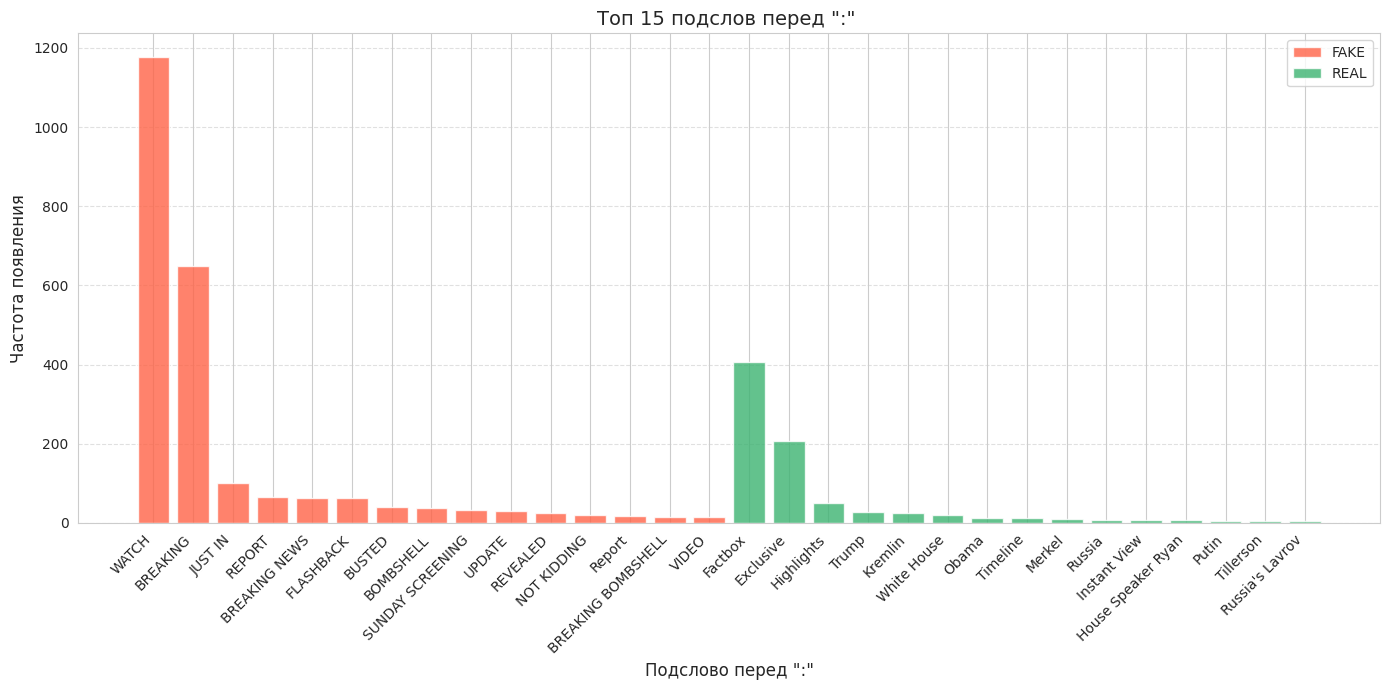

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

def extract_top_colon_starters(df, top_n=15):
    mask = df['title'].str.contains(':', case=False, na=False)
    titles_with_colon = df[mask]['title']

    def extract_before_colon(text):
        match = re.findall(r'^([^:]+):', text)
        return [m.strip() for m in match]  # 🔧 Удаляем пробелы вокруг

    all_words = []
    for title in titles_with_colon:
        words = extract_before_colon(title)
        all_words.extend(words)

    return Counter(all_words).most_common(top_n)

# Извлекаем топ слова
top_fake = extract_top_colon_starters(df_fake, top_n=15)
top_true = extract_top_colon_starters(df_true, top_n=15)

# Объединяем в один DataFrame
df_plot = pd.DataFrame({
    'word': [w for w, _ in top_fake + top_true],
    'count': [c for _, c in top_fake + top_true],
    'dataset': ['FAKE'] * len(top_fake) + ['REAL'] * len(top_true)
})

# Удалим дубликаты слов для корректного отображения
df_plot = df_plot.drop_duplicates(subset=['word', 'dataset'])

# Визуализация
plt.figure(figsize=(14, 7))
colors = {'FAKE': 'tomato', 'REAL': 'mediumseagreen'}

# Построим бруски рядом друг с другом
for label in df_plot['dataset'].unique():
    subset = df_plot[df_plot['dataset'] == label]
    plt.bar(subset['word'], subset['count'], label=label, alpha=0.8, color=colors[label])

plt.title('Топ 15 подслов перед ":" ', fontsize=14)
plt.xlabel('Подслово перед ":"', fontsize=12)
plt.ylabel('Частота появления', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Сначала train+val vs test
x_temp, x_test, y_temp, y_test = train_test_split(
    df['title'], df['label'],
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)

# Затем train vs val
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp,
    test_size=0.25,  # 0.25 * 0.8 = 0.2 от общего
    stratify=y_temp,
    random_state=42
)

# Проверка размеров
print(f"Train: {len(x_train)}")
print(f"Validation: {len(x_val)}")
print(f"Test: {len(x_test)}")


Train: 23237
Validation: 7746
Test: 7746


In [ ]:
print(y_val.value_counts())

label
1    4165
0    3581
Name: count, dtype: int64


In [ ]:
print(df['label'].value_counts())

label
1    20826
0    17903
Name: count, dtype: int64


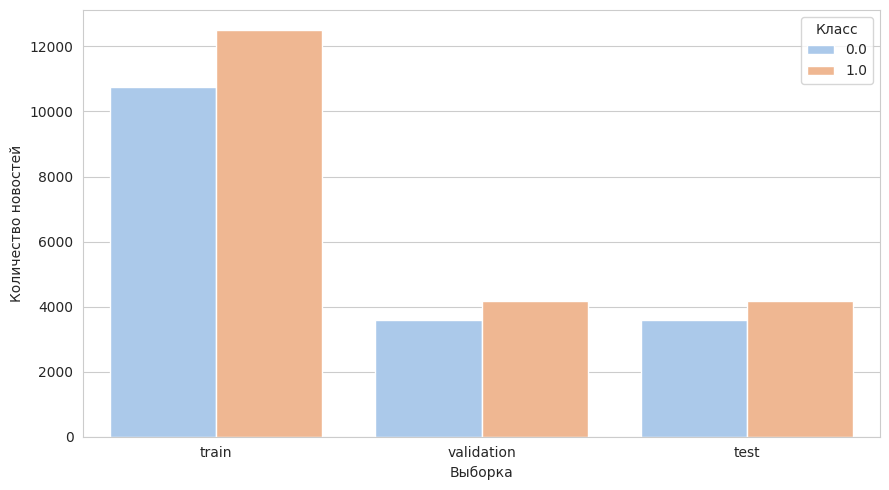

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Предположим, у тебя есть переменные: y_train, y_val, y_test

# Создадим DataFrame для визуализации
df_plot = pd.DataFrame({

    'train': pd.Series(y_train),
    'validation': pd.Series(y_val),
    'test': pd.Series(y_test),

})

# Преобразуем в "long-form" для Seaborn
df_melted = df_plot.melt(var_name='Split', value_name='Label')

plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Построим countplot
sns.countplot(data=df_melted, x='Split', hue='Label')

plt.ylabel("Количество новостей")
plt.xlabel("Выборка")
plt.legend(title="Класс", loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Количество элементов
total = len(df['label'])
counts = df['label'].value_counts(normalize=True) * 100  # В процентах

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
palette = {'0': 'firebrick', '1': 'limegreen'}


ax = sns.countplot(x=df['label'], palette=palette)

# Подписи в % над столбиками
for p in ax.patches:
    percent = (p.get_height() / total) * 100
    ax.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                ha='center', va='bottom', fontsize=10)

plt.xticks([0, 1], ['Fake (0)', 'True (1)'])
plt.xlabel("Класс")
plt.ylabel("Количество новостей")
plt.title("Распределение классов в датасете")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorization = TfidfVectorizer()
xv_train =  TfidfVectorizer(stop_words=list(stopwords.words('english')), max_df=0.9, min_df=5)
xv_test = vectorization.transform(x_test)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
stop_words = text.ENGLISH_STOP_WORDS  # + свой список при необходимости
vectorizer = TfidfVectorizer(stop_words=list(stopwords.words('english')), max_df=0.9, min_df=5)
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test)

In [ ]:
xv_train[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 5647)>

In [ ]:
# Разделяем на train/test
from sklearn.model_selection import train_test_split


# Кросс-валидация ТОЛЬКО на X_train
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores = cross_val_score(model, xv_train, y_train, cv=5)

print("Средняя точность на тренировке (кросс-валидация):", scores.mean())

# После этого — уже финальное обучение и тест
model.fit(xv_train, y_train)
test_score = model.score(xv_test, y_test)
print("Оценка на отложенном тесте:", test_score)


Средняя точность на тренировке (кросс-валидация): 0.9191806514076225
Оценка на отложенном тесте: 0.9240898528272656


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)


0.9363542473534727

In [ ]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


label
1    0.537763
0    0.462237
Name: proportion, dtype: float64
label
1    0.537697
0    0.462303
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import classification_report, f1_score

# Предсказания уже есть:
# pred_lr = LR.predict(xv_test)

print("🔍 Logistic Regression classification report:")
print(classification_report(y_test, pred_lr))

f1 = f1_score(y_test, pred_lr, average='weighted')  # Или 'macro', 'micro' — зависит от задачи
print(f"✅ F1-score (weighted): {f1:.4f}")


🔍 Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3581
           1       0.93      0.95      0.94      4165

    accuracy                           0.94      7746
   macro avg       0.94      0.94      0.94      7746
weighted avg       0.94      0.94      0.94      7746

✅ F1-score (weighted): 0.9363


In [ ]:
from sklearn.metrics import classification_report, f1_score

# Предсказания уже есть:
# pred_lr = LR.predict(xv_test)

print("🔍 Logistic Regression classification report:")
print(classification_report(y_test, pred_lr))

f1 = f1_score(y_test, pred_lr, average='weighted')  # Или 'macro', 'micro' — зависит от задачи
print(f"✅ F1-score (weighted): {f1:.4f}")


🔍 Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3581
           1       0.92      0.94      0.93      4165

    accuracy                           0.92      7746
   macro avg       0.92      0.92      0.92      7746
weighted avg       0.92      0.92      0.92      7746

✅ F1-score (weighted): 0.9240


In [ ]:
pattern = r'^([a-zA-Z]+):'

# Находим все совпадения
matches = [re.match(pattern, text) for text in x_train]
prefixes = [match.group(1).lower() for match in matches if match]  # группируем без учёта регистра

# Считаем количество каждого префикса
prefix_counts = Counter(prefixes)

print("Количество строк с двоеточием в начале:", len(prefixes))
print("Распределение по префиксам:", prefix_counts)

Количество строк с двоеточием в начале: 212
Распределение по префиксам: Counter({'trump': 15, 'kremlin': 12, 'obama': 9, 'wikileaks': 5, 'merkel': 5, 'russia': 5, 'embarrassing': 4, 'clinton': 4, 'germany': 4, 'text': 3, 'pence': 3, 'shocking': 3, 'tillerson': 3, 'lavrov': 2, 'alert': 2, 'ryan': 2, 'reckless': 2, 'biden': 2, 'unbelievable': 2, 'jumblatt': 2, 'disgusting': 2, 'syria': 2, 'assange': 2, 'macron': 2, 'priceless': 2, 'stunning': 2, 'explainer': 2, 'obamacare': 2, 'henningsen': 2, 'warning': 2, 'putin': 2, 'mn': 2, 'priorities': 2, 'surreal': 1, 'indiana': 1, 'france': 1, 'sickening': 1, 'alarming': 1, 'shameful': 1, 'irony': 1, 'chilling': 1, 'today': 1, 'disturbing': 1, 'moore': 1, 'photos': 1, 'haley': 1, 'atzmon': 1, 'hypocrisy': 1, 'philippines': 1, 'disgrace': 1, 'hillary': 1, 'missing': 1, 'professor': 1, 'adele': 1, 'mattis': 1, 'mcpain': 1, 'broke': 1, 'powerful': 1, 'boehner': 1, 'sessions': 1, 'obamanation': 1, 'florida': 1, 'amerika': 1, 'pentagon': 1, 'astroturf

In [ ]:
import numpy as np
print(np.bincount(y_train))
print(np.bincount(y_test))

[10471 12715]
[3491 4238]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3581
           1       0.93      0.95      0.94      4165

    accuracy                           0.94      7746
   macro avg       0.94      0.94      0.94      7746
weighted avg       0.94      0.94      0.94      7746

[[3286  295]
 [ 198 3967]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3581
           1       0.93      0.95      0.94      4165

    accuracy                           0.94      7746
   macro avg       0.94      0.94      0.94      7746
weighted avg       0.94      0.94      0.94      7746

[[3286  295]
 [ 198 3967]]


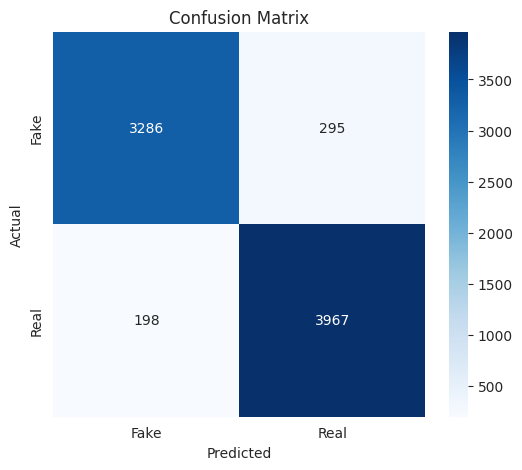

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_lr)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=[ "Fake","Real"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LR, xv_train, y_train, cv=5, scoring='f1_weighted')
print(f"📊 Cross-validated F1-score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

📊 Cross-validated F1-score: 0.9293 ± 0.0025


In [ ]:

feature_names = vectorization.get_feature_names_out()
coefficients = LR.coef_[0]

# Топ-20 слов для класса fake (1)
top_fake_idx = np.argsort(coefficients)[-20:]
# Топ-20 слов для real (0)
top_real_idx = np.argsort(coefficients)[:20]

print("\n🧪 Top 20 слов, указывающих на REAL:")
for idx in reversed(top_fake_idx):
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

print("\n📰 Top 20 слов, указывающих на FAKE:")
for idx in top_real_idx:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")



🧪 Top 20 слов, указывающих на REAL:
says: 8.6521
house: 4.3073
eu: 3.9102
china: 3.8931
talks: 3.4326
tax: 3.3178
urges: 3.2544
myanmar: 3.2107
south: 3.0624
pm: 3.0441
brexit: 3.0305
lawmakers: 3.0087
probe: 2.9319
britain: 2.9179
senate: 2.8875
rohingya: 2.8483
opposition: 2.7880
trade: 2.7242
ex: 2.6820
turkey: 2.6352

📰 Top 20 слов, указывающих на FAKE:
hillary: -7.9379
gop: -7.5429
the: -6.9028
just: -6.2577
us: -5.9382
and: -5.1423
is: -5.0131
his: -4.6737
you: -4.4420
racist: -4.3412
this: -4.2033
black: -4.1942
donald: -4.0725
are: -4.0468
muslim: -3.9657
watch: -3.9181
him: -3.7422
her: -3.7392
why: -3.6603
america: -3.6012



🧪 Top 20 слов, указывающих на REAL:
says: 8.6521
house: 4.3073
eu: 3.9102
china: 3.8931
talks: 3.4326
tax: 3.3178
urges: 3.2544
myanmar: 3.2107
south: 3.0624
pm: 3.0441
brexit: 3.0305
lawmakers: 3.0087
probe: 2.9319
britain: 2.9179
senate: 2.8875
rohingya: 2.8483
opposition: 2.7880
trade: 2.7242
ex: 2.6820
turkey: 2.6352

📰 Top 20 слов, указывающих на FAKE:
hillary: -7.9379
gop: -7.5429
the: -6.9028
just: -6.2577
us: -5.9382
and: -5.1423
is: -5.0131
his: -4.6737
you: -4.4420
racist: -4.3412
this: -4.2033
black: -4.1942
donald: -4.0725
are: -4.0468
muslim: -3.9657
watch: -3.9181
him: -3.7422
her: -3.7392
why: -3.6603
america: -3.6012


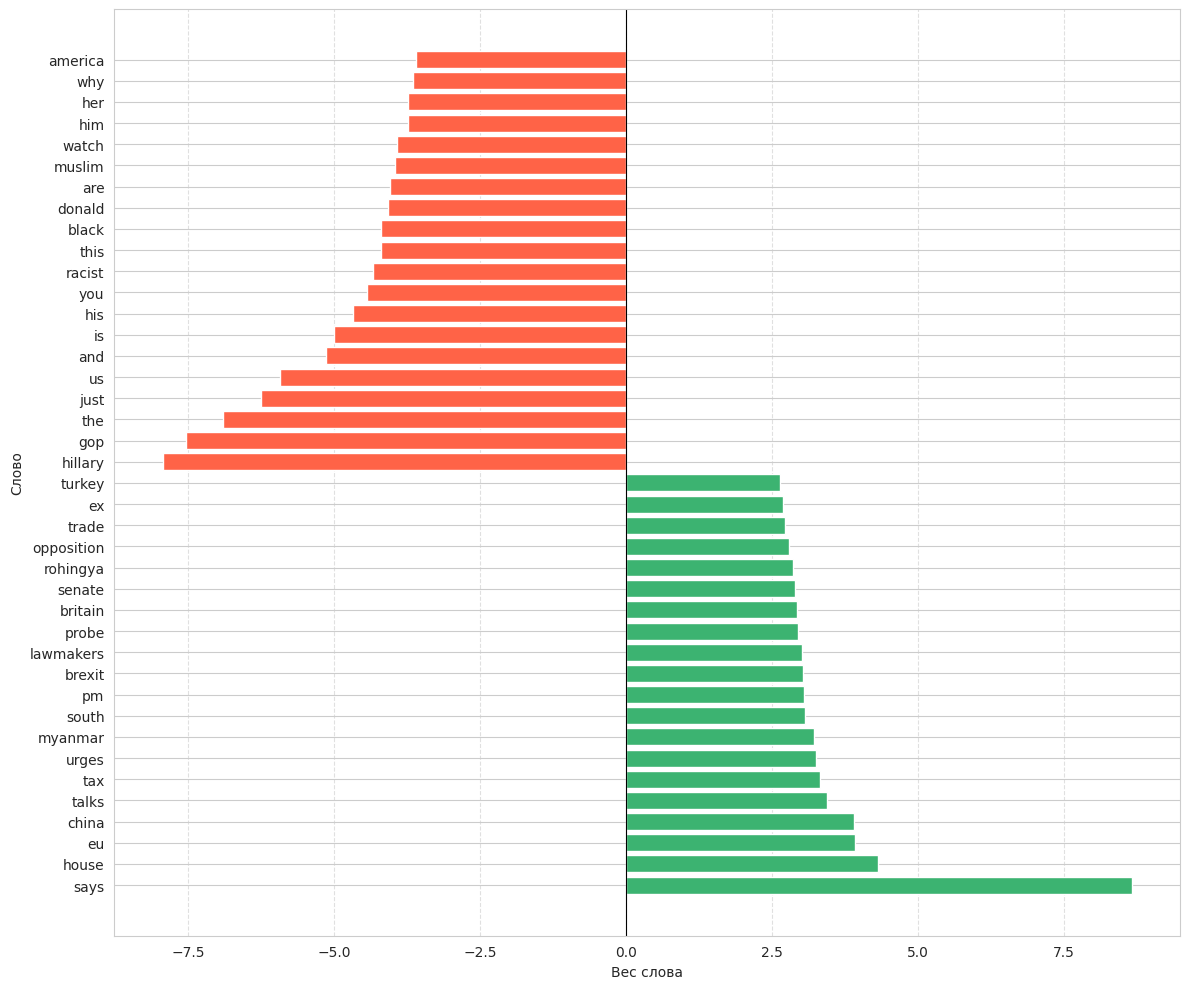

In [ ]:

feature_names = vectorization.get_feature_names_out()
coefficients = LR.coef_[0]

# Топ-20 слов для класса fake (1)
top_fake_idx = np.argsort(coefficients)[-20:]
# Топ-20 слов для real (0)
top_real_idx = np.argsort(coefficients)[:20]

print("\n🧪 Top 20 слов, указывающих на REAL:")
for idx in reversed(top_fake_idx):
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

print("\n📰 Top 20 слов, указывающих на FAKE:")
for idx in top_real_idx:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

import numpy as np
import matplotlib.pyplot as plt

# Получаем индексы самых "реальных" и "фейковых" признаков
top_fake_idx = np.argsort(coefficients)[-20:]
top_real_idx = np.argsort(coefficients)[:20]

# Слова и коэффициенты
top_fake_words = [(feature_names[i], coefficients[i]) for i in top_fake_idx]
top_real_words = [(feature_names[i], coefficients[i]) for i in top_real_idx]

# Объединяем и инвертируем коэффициенты для визуального контраста
words = [w for w, _ in reversed(top_fake_words)] + [w for w, _ in top_real_words]
values = [v for _, v in reversed(top_fake_words)] + [v for _, v in top_real_words]

colors = ['mediumseagreen'] * 20 + ['tomato'] * 20

# Визуализация
plt.figure(figsize=(12, 10))
plt.barh(words, values, color=colors)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Вес слова')
plt.ylabel('Слово')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [ ]:

feature_names = vectorizer.get_feature_names_out()
coefficients = LR.coef_[0]

# Топ-20 слов для класса fake (1)
top_fake_idx = np.argsort(coefficients)[-20:]
# Топ-20 слов для real (0)
top_real_idx = np.argsort(coefficients)[:20]

print("\n🧪 Top 20 слов, указывающих на REAL:")
for idx in reversed(top_fake_idx):
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

print("\n📰 Top 20 слов, указывающих на FAKE:")
for idx in top_real_idx:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")



🧪 Top 20 слов, указывающих на REAL:
says: 6.9605
house: 4.2328
china: 3.8881
eu: 3.5512
talks: 3.5227
urges: 3.3367
myanmar: 3.3225
senate: 3.2788
south: 3.1830
brexit: 3.1599
lawmakers: 3.0534
tax: 3.0523
rohingya: 2.9427
opposition: 2.8547
pm: 2.8149
probe: 2.7954
german: 2.7563
ex: 2.7561
britain: 2.7419
uk: 2.7397

📰 Top 20 слов, указывающих на FAKE:
hillary: -8.1905
gop: -7.6196
us: -5.7841
donald: -4.5441
racist: -4.2128
bernie: -3.9129
black: -3.8822
muslim: -3.7753
watch: -3.7624
america: -3.6561
gets: -3.5373
like: -3.2956
wow: -3.0951
one: -3.0441
liberal: -2.9750
obama: -2.9624
shocking: -2.9499
hilarious: -2.9207
cops: -2.8806
isis: -2.8612


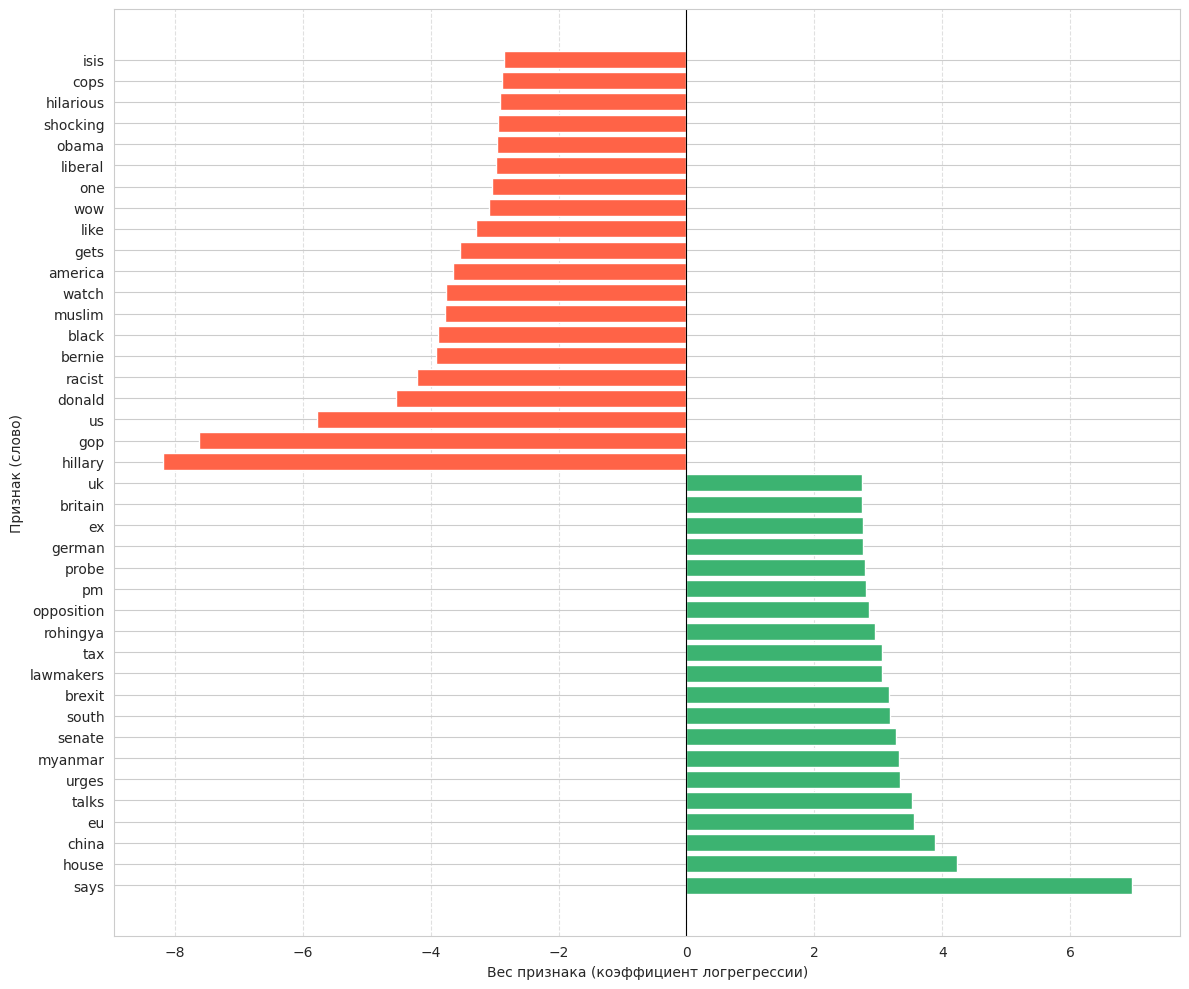

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Получаем индексы самых "реальных" и "фейковых" признаков
top_fake_idx = np.argsort(coefficients)[-20:]
top_real_idx = np.argsort(coefficients)[:20]

# Слова и коэффициенты
top_fake_words = [(feature_names[i], coefficients[i]) for i in top_fake_idx]
top_real_words = [(feature_names[i], coefficients[i]) for i in top_real_idx]

# Объединяем и инвертируем коэффициенты для визуального контраста
words = [w for w, _ in reversed(top_fake_words)] + [w for w, _ in top_real_words]
values = [v for _, v in reversed(top_fake_words)] + [v for _, v in top_real_words]

colors = ['mediumseagreen'] * 20 + ['tomato'] * 20

# Визуализация
plt.figure(figsize=(12, 10))
plt.barh(words, values, color=colors)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Вес признака (коэффициент логрегрессии)')
plt.ylabel('Признак (слово)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

DT = RandomForestClassifier(random_state=0)
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.8907823392718822

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3581
           1       0.86      0.84      0.85      4165

    accuracy                           0.84      7746
   macro avg       0.84      0.84      0.84      7746
weighted avg       0.84      0.84      0.84      7746



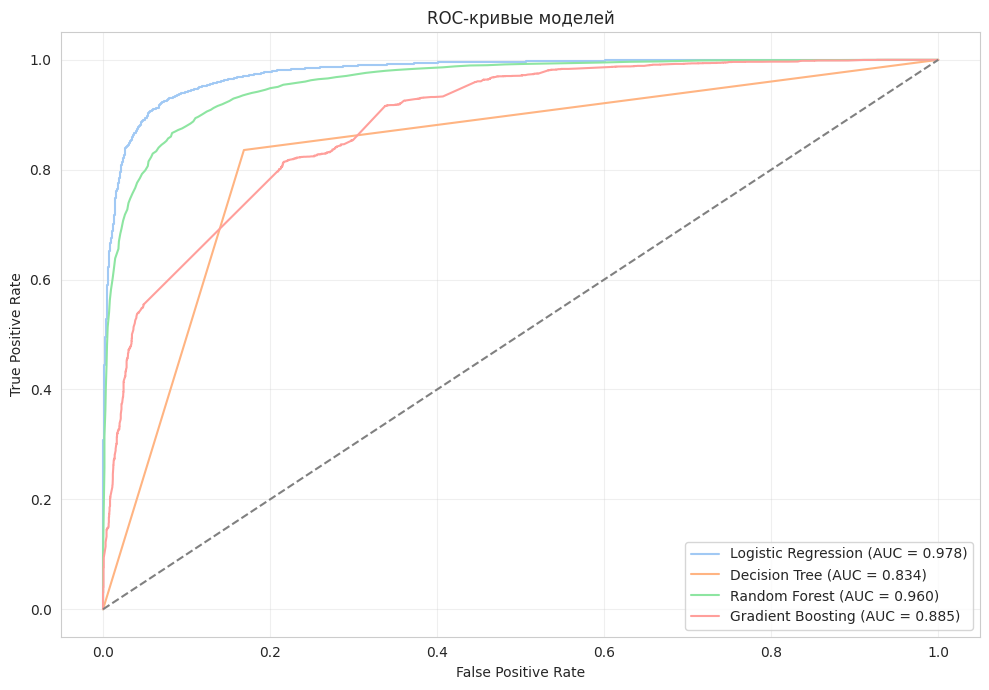

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Модели
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier()
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Обучение
    model.fit(xv_train, y_train)

    # Предсказание вероятностей
    y_probs = model.predict_proba(xv_test)[:, 1]  # вероятности класса "1"

    # ROC кривая
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Отрисовка
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Настройки графика
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # базовая линия
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые моделей')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


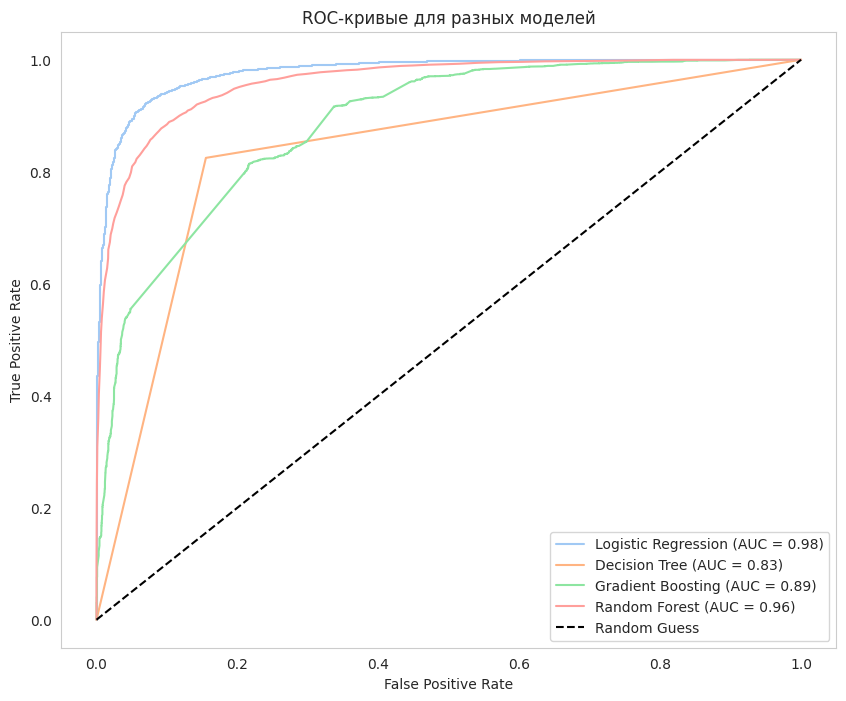

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

# Модели
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier()
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(xv_train, y_train)

    # Получаем вероятности (не предсказания классов, а вероятности принадлежности к классу 1)
    probs = model.predict_proba(xv_test)[:, 1]

    # ROC: вычисление FPR и TPR
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # График
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Диагональ случайного выбора
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для разных моделей')
plt.legend(loc='lower right')
plt.grid()
plt.show()


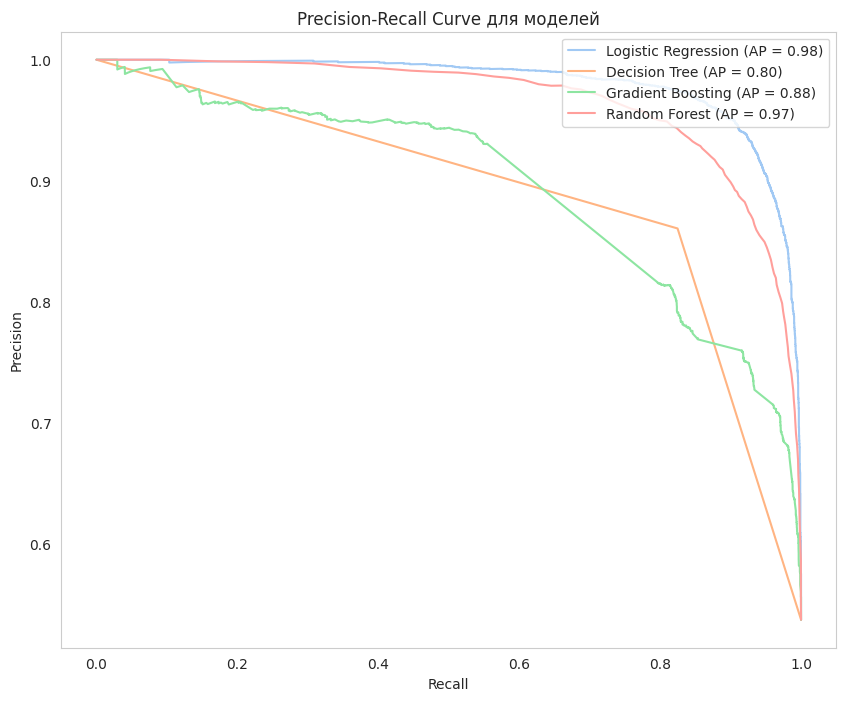

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for name, model in models.items():
    probs = model.predict_proba(xv_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, probs)
    avg_precision = average_precision_score(y_test, probs)

    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve для моделей')
plt.legend(loc='upper right')
plt.grid()
plt.show()


🔎 Confusion Matrix для Logistic Regression


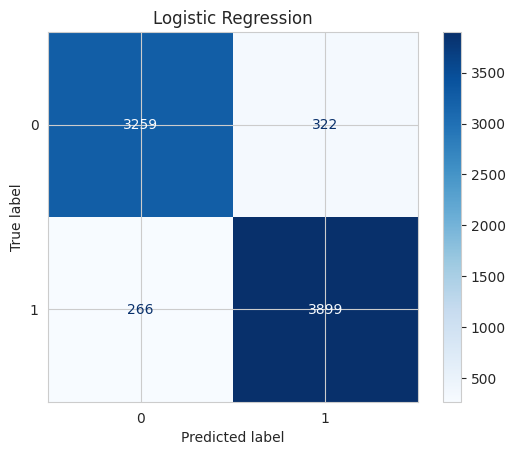

🔎 Confusion Matrix для Decision Tree


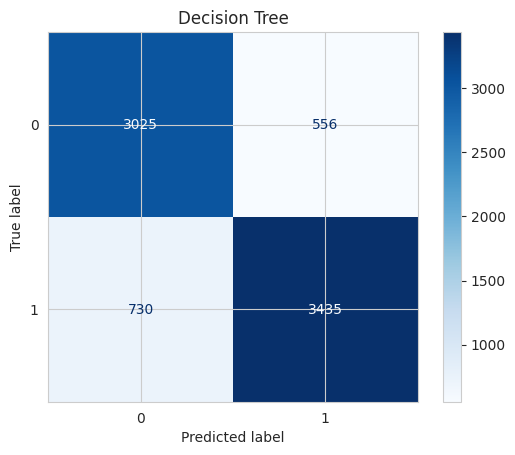

🔎 Confusion Matrix для Gradient Boosting


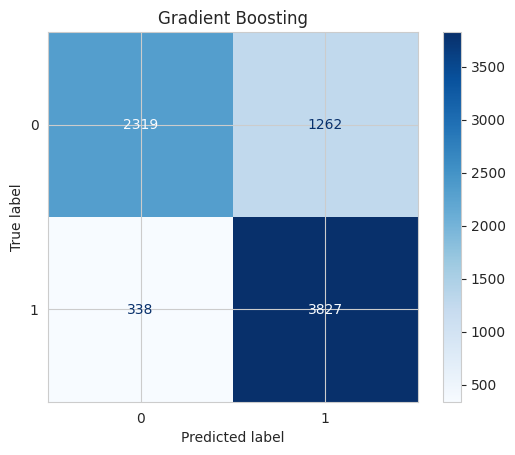

🔎 Confusion Matrix для Random Forest


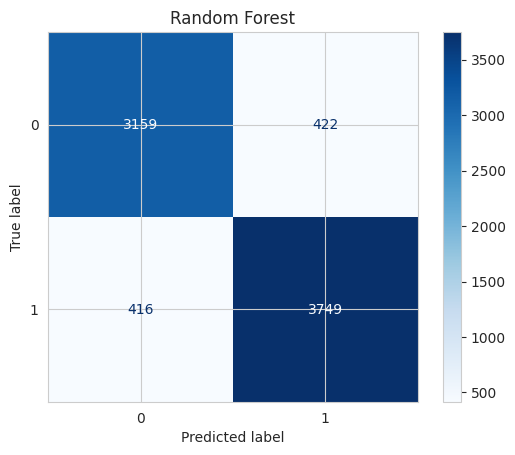

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    preds = model.predict(xv_test)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    print(f"🔎 Confusion Matrix для {name}")
    disp.plot(cmap='Blues')
    plt.title(name)
    plt.show()


------------------------------------------------

In [ ]:
vectorizer = TextVectorization(max_tokens=20000,
                               output_sequence_length=600,
                               output_mode='int')
vectorizer.adapt(x_train.values.tolist())

vectorized_train_text = vectorizer(x_train.values)
vectorized_test_text = vectorizer(x_test.values)

In [ ]:
def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)
df['len']=df["title"].apply(count_words)
df.describe()
df=df.drop(df[df['len'] == 0].index)
df=df.reset_index(drop=True)
df

,title,label,len
0,supreme court justice ginsburg 'regrets' trump...,1,7
1,dozens of gop foreign policy experts pledge t...,0,13
2,trump laughed after woman was grabbed ‘by th...,0,13
3,"in north dakota, trump finds democrat willing ...",1,11
4,"flash floods kill five in malaysia, army deplo...",1,13
...,...,...,...
38719,oklahoma republicans are trying to impeach ob...,0,12
38720,the horrible end game: bernie sanders calls fo...,0,14
38721,france overseas minister says two killed in fr...,1,12
38722,trump stole an idea from north korean propaga...,0,15


In [ ]:
df.describe()

,label,len
count,38724.000000,38724.000000
mean,0.537806,12.213408
std,0.498575,3.773643
min,0.000000,1.000000
25%,0.000000,10.000000
50%,1.000000,11.000000
75%,1.000000,14.000000
max,1.000000,44.000000


In [ ]:
LR = LogisticRegression()
LR.fit(vectorized_train_text,y_train)
pred_lr=LR.predict(vectorized_test_text)
LR.score(vectorized_test_text, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6846325167037862

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# 1. Создание и настройка векторизатора
vectorizer = TextVectorization(
    max_tokens=100000,  # Увеличенный размер словаря
    output_sequence_length=600,  # Увеличенная длина текста
    output_mode='int',
    standardize='lower_and_strip_punctuation'
)

# 2. Обучение векторизатора
vectorizer.adapt(x_train.tolist())  # Убедимся, что передаем список строк

# 3. Преобразование текста в векторы
vectorized_train_text = vectorizer(x_train.tolist())
vectorized_test_text = vectorizer(x_test.tolist())

# 4. Преобразование в numpy-массив для sklearn
vectorized_train_text = np.array(vectorized_train_text)
vectorized_test_text = np.array(vectorized_test_text)

# 5. Обучение логистической регрессии
LR = LogisticRegression(max_iter=500)  # Увеличиваем число итераций для лучшей сходимости
LR.fit(vectorized_train_text, y_train)

# 6. Оценка модели
pred_lr = LR.predict(vectorized_test_text)
accuracy = LR.score(vectorized_test_text, y_test)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6711


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
from tensorflow.keras.layers import TextVectorization, Embedding
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

# 1. Настроим векторизатор
vectorizer = TextVectorization(
    max_tokens=50000,  # Уменьшаем размер словаря (100000 → 50000)
    output_sequence_length=400,  # Уменьшаем длину последовательности (600 → 400)
    standardize='lower_and_strip_punctuation'
)
vectorizer.adapt(x_train.tolist())

# 2. Преобразуем тексты в последовательности индексов (разреженный тензор)
vectorized_train_text = vectorizer(np.array(x_train))
vectorized_test_text = vectorizer(np.array(x_test))

# 3. Создаем слой Embedding (без обучения)
embedding_layer = Embedding(input_dim=50000, output_dim=64, input_length=400)

# 4. Функция для обработки данных по частям (чтобы не перегружать память)
def get_embeddings(data, batch_size=512):
    num_samples = data.shape[0]
    embeddings = []

    for i in range(0, num_samples, batch_size):
        batch = data[i:i+batch_size]  # Берем небольшой кусок данных
        embedded_batch = embedding_layer(batch)  # Применяем Embedding
        averaged_batch = tf.reduce_mean(embedded_batch, axis=1)  # Усредняем эмбеддинги
        embeddings.append(averaged_batch.numpy())  # Конвертируем в numpy и сохраняем

    return np.vstack(embeddings)  # Склеиваем все части в один массив

# 5. Генерация эмбеддингов (по частям, без переполнения памяти)
embedded_train_text = get_embeddings(vectorized_train_text, batch_size=512)
embedded_test_text = get_embeddings(vectorized_test_text, batch_size=512)

# 6. Обучаем логистическую регрессию
LR = LogisticRegression(max_iter=500)
LR.fit(embedded_train_text, y_train)

# 7. Оценка модели
accuracy = LR.score(embedded_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Accuracy: 0.6042


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Flatten, Dense
from tensorflow.keras.models import Sequential

# 1. Настроим векторизатор
vectorizer = TextVectorization(
    max_tokens=100000,
    output_sequence_length=64,
    standardize='lower_and_strip_punctuation'
)

# 2. Обучаем векторизатор на обучающих данных
vectorizer.adapt(x_train.tolist())

# 3. Преобразуем тексты в последовательности индексов
vectorized_train_text = vectorizer(x_train.tolist())
vectorized_test_text = vectorizer(x_test.tolist())

# 4. Создаем модель с Embedding-слоем
model = Sequential([
    Embedding(input_dim=100000, output_dim=256, input_length=64),  # Эмбеддинг
     Dropout(0.3),
    Flatten(),  # Разворачиваем тензор в одномерный вектор
    Dense(1, activation='sigmoid')  # Классификатор
])

# 5. Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Обучаем модель
model.fit(vectorized_train_text, y_train, epochs=10, batch_size=64, validation_data=(vectorized_test_text, y_test))

# 7. Оцениваем точность
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")


Epoch 1/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8221 - loss: 0.3857 - val_accuracy: 0.9574 - val_loss: 0.1169
Epoch 2/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9750 - loss: 0.0748 - val_accuracy: 0.9620 - val_loss: 0.0989
Epoch 3/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9930 - loss: 0.0290 - val_accuracy: 0.9628 - val_loss: 0.0990
Epoch 4/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9982 - loss: 0.0113 - val_accuracy: 0.9633 - val_loss: 0.1036
Epoch 5/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9998 - loss: 0.0046 - val_accuracy: 0.9615 - val_loss: 0.1084
Epoch 6/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9619 - val_loss: 0.1142
Epoch 7/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9622 - val_loss: 0.1176
Epoch 8/10
364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 1.0000 - loss: 8.9001e-04 - val_accurac

In [ ]:
#17 апреля преза

In [ ]:
vectorized_val_text = vectorizer(x_val.tolist())
loss, accuracy = model.evaluate(vectorized_val_text, y_val)
print(f"Accuracy: {accuracy:.4f}")


243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1455
Accuracy: 0.9610


In [ ]:
from sklearn.metrics import classification_report

# Предсказания и округление до 0/1
y_pred_probs = model.predict(vectorized_val_text)
y_pred = (y_pred_probs > 0.5).astype(int)

# Отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9670    0.9481    0.9574      3581
           1     0.9561    0.9721    0.9640      4165

    accuracy                         0.9610      7746
   macro avg     0.9615    0.9601    0.9607      7746
weighted avg     0.9611    0.9610    0.9610      7746



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


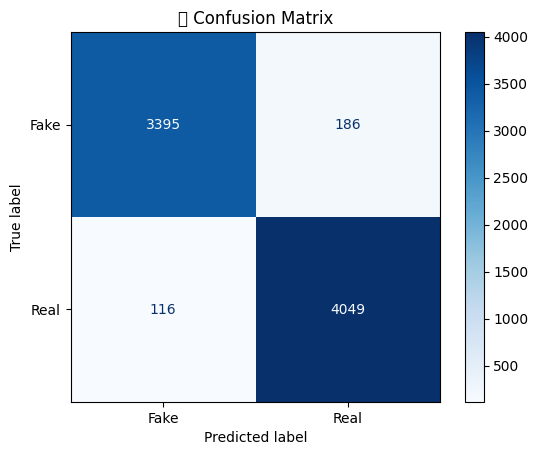

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Flatten, Dense, LSTM,Dropout
from tensorflow.keras.models import Sequential

# 1. Настроим векторизатор
vectorizer = TextVectorization(
    max_tokens=100000,
    output_sequence_length=64,
    standardize='lower_and_strip_punctuation'
)

# 2. Обучаем векторизатор на обучающих данных
vectorizer.adapt(x_train.tolist())

# 3. Преобразуем тексты в последовательности индексов
vectorized_train_text = vectorizer(x_train.tolist())
vectorized_test_text = vectorizer(x_test.tolist())

# 4. Создаем модель с Embedding-слоем
model1 = Sequential([
    Embedding(input_dim=100000, output_dim=256, input_length=64),  # Эмбеддинг
    Dropout(0.3),
    LSTM(128),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Классификатор
])

# 5. Компилируем модель
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Обучаем модель
model1.fit(vectorized_train_text, y_train, epochs=12, batch_size=64, validation_data=(vectorized_test_text, y_test))

# 7. Оцениваем точность
vectorized_val_text = vectorizer(x_val.tolist())
loss, accuracy = model1.evaluate(vectorized_val_text, y_val)
print(f"Accuracy: {accuracy:.4f}")


Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


364/364 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5276 - loss: 0.6924 - val_accuracy: 0.5377 - val_loss: 0.6911
Epoch 2/12
364/364 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.5420 - loss: 0.6903 - val_accuracy: 0.5377 - val_loss: 0.6915
Epoch 3/12
364/364 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5400 - loss: 0.6902 - val_accuracy: 0.5377 - val_loss: 0.6905
Epoch 4/12
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5368 - loss: 0.6903 - val_accuracy: 0.5377 - val_loss: 0.6909
Epoch 5/12
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5330 - loss: 0.6910 - val_accuracy: 0.5377 - val_loss: 0.6905
Epoch 6/12
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5408 - loss: 0.6907 - val_accuracy: 0.5412 - val_loss: 0.7064
Epoch 7/12
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6617 - loss: 0.6264 - val_accuracy: 0.8412 - val_loss: 0.4051
Epoch 8/12
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9047 - loss: 0.2630 - val_accuracy

In [ ]:
model1.fit(vectorized_train_text, y_train, epochs=1, batch_size=64, validation_data=(vectorized_test_text, y_test))

364/364 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9520 - val_loss: 0.2525


In [ ]:
loss, accuracy = model1.evaluate(vectorized_val_text, y_val)
print(f"Accuracy: {accuracy:.4f}")

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9457 - loss: 0.2883
Accuracy: 0.9482


243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9619    0.9246    0.9429      3581
           1     0.9373    0.9685    0.9527      4165

    accuracy                         0.9482      7746
   macro avg     0.9496    0.9466    0.9478      7746
weighted avg     0.9487    0.9482    0.9481      7746



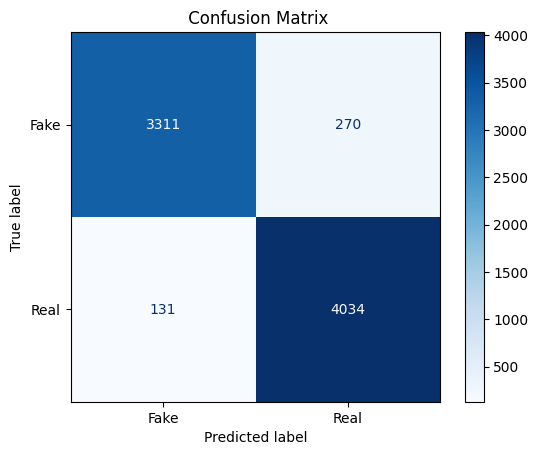

In [ ]:
from sklearn.metrics import classification_report

# Предсказания и округление до 0/1
y_pred_probs = model1.predict(vectorized_val_text)
y_pred = (y_pred_probs > 0.5).astype(int)

# Отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix")
plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

    def get_config(self):
        config = super().get_config()
        config.update({
            "seq_length": self.seq_length,
            "embed_dim": self.embed_dim
        })
        return config

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)
    y = Dense(ff_dim, activation="gelu")(x)
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=64,
    embed_dim=128,
    num_heads=4,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_val_text, y_val)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - accuracy: 0.7888 - loss: 0.4385 - val_accuracy: 0.9351 - val_loss: 0.1721
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9524 - loss: 0.1322 - val_accuracy: 0.9395 - val_loss: 0.1613
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9690 - loss: 0.0880 - val_accuracy: 0.8904 - val_loss: 0.3162
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9753 - loss: 0.0690 - val_accuracy: 0.9475 - val_loss: 0.1579
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9852 - loss: 0.0452 - val_accuracy: 0.9480 - val_loss: 0.1636
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9486 - loss: 0.1575
Accuracy: 0.9480


243/243 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0     0.9404    0.9475    0.9439      3581
           1     0.9546    0.9484    0.9515      4165

    accuracy                         0.9480      7746
   macro avg     0.9475    0.9479    0.9477      7746
weighted avg     0.9480    0.9480    0.9480      7746



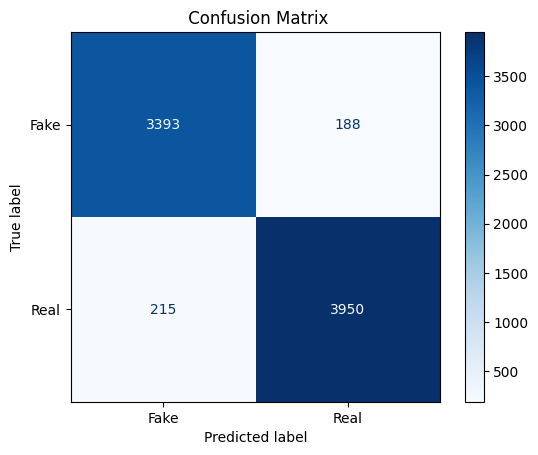

In [ ]:
from sklearn.metrics import classification_report

# Предсказания и округление до 0/1
y_pred_probs = model.predict(vectorized_val_text)
y_pred = (y_pred_probs > 0.5).astype(int)

# Отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix")
plt.show()


In [ ]:
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_val_text, y_val)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9875 - loss: 0.0416 - val_accuracy: 0.9480 - val_loss: 0.1658
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9862 - loss: 0.0420 - val_accuracy: 0.9480 - val_loss: 0.1682
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9858 - loss: 0.0422 - val_accuracy: 0.9478 - val_loss: 0.1688
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9886 - loss: 0.0373 - val_accuracy: 0.9475 - val_loss: 0.1759
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9896 - loss: 0.0350 - val_accuracy: 0.9475 - val_loss: 0.1717
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9492 - loss: 0.1660
Accuracy: 0.9487


243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0     0.9467    0.9422    0.9444      3581
           1     0.9505    0.9544    0.9524      4165

    accuracy                         0.9487      7746
   macro avg     0.9486    0.9483    0.9484      7746
weighted avg     0.9487    0.9487    0.9487      7746



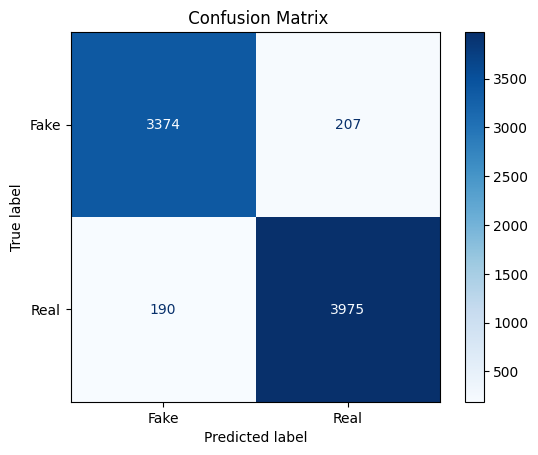

In [ ]:
from sklearn.metrics import classification_report

# Предсказания и округление до 0/1
y_pred_probs = model.predict(vectorized_val_text)
y_pred = (y_pred_probs > 0.5).astype(int)

# Отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix")
plt.show()


Epoch 1/2
727/727 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9900 - loss: 0.0375 - val_accuracy: 0.9471 - val_loss: 0.1743
Epoch 2/2
727/727 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9890 - loss: 0.0381 - val_accuracy: 0.9477 - val_loss: 0.1764
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9485 - loss: 0.1702
Accuracy: 0.9475
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0     0.9396    0.9472    0.9434      3581
           1     0.9543    0.9477    0.9510      4165

    accuracy                         0.9475      7746
   macro avg     0.9470    0.9474    0.9472      7746
weighted avg     0.9475    0.9475    0.9475      7746



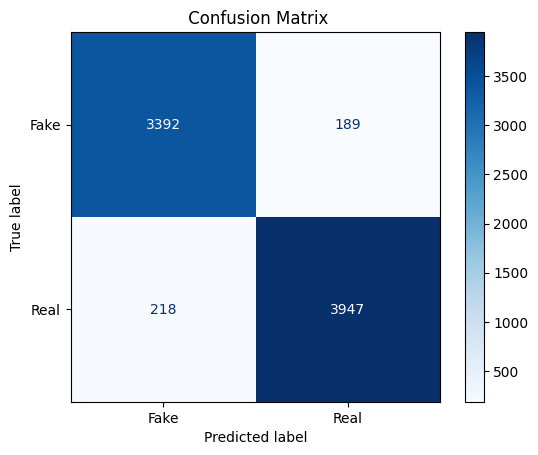

In [ ]:
history = model.fit(
    vectorized_train_text, y_train,
    epochs=2,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_val_text, y_val)
print(f"Accuracy: {accuracy:.4f}")
from sklearn.metrics import classification_report

# Предсказания и округление до 0/1
y_pred_probs = model.predict(vectorized_val_text)
y_pred = (y_pred_probs > 0.5).astype(int)

# Отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix")
plt.show()


старое

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, Input, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Model

# 1. Настраиваем векторизатор (как у вас)
vectorizer = TextVectorization(
    max_tokens=100000,
    output_sequence_length=600,
    standardize='lower_and_strip_punctuation'
)
vectorizer.adapt(x_train.tolist())

# 2. Преобразуем тексты в последовательности
vectorized_train_text = vectorizer(x_train.tolist())
vectorized_test_text = vectorizer(x_test.tolist())

# 3. Создаём Transformer-модель
def build_transformer_model():
    inputs = Input(shape=(600,), dtype=tf.int32)  # input_length=600

    # Эмбеддинг + позиционное кодирование (упрощённо)
    x = Embedding(input_dim=100000, output_dim=128)(inputs)

    # Transformer Block
    x = MultiHeadAttention(num_heads=4, key_dim=128)(x, x)  # Self-Attention
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(0.1)(x)

    # Усреднение по временной оси
    x = GlobalAveragePooling1D()(x)

    # Классификатор
    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs=inputs, outputs=outputs)

model = build_transformer_model()

# 4. Компилируем
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Обучаем
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 6. Оценка
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")



Epoch 1/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 60s 52ms/step - accuracy: 0.8189 - loss: 0.3662 - val_accuracy: 0.9906 - val_loss: 0.0328
Epoch 2/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9958 - val_loss: 0.0192
Epoch 3/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9969 - val_loss: 0.0150
Epoch 4/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9961 - val_loss: 0.0207
Epoch 5/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9949 - val_loss: 0.0271
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9958 - loss: 0.0223
Accuracy: 0.9949


NameError: name 'TFBertModel' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="relu")(x)
    y = Dense(inputs.shape[-1])(y)  # Возвращаем исходную размерность
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)  # Ещё residual

def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,  # Количество Transformer-блоков
    dropout=0.1
):
    inputs = Input(shape=(seq_length,))

    # Embedding
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)

    # Несколько Transformer-блоков
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Классификатор
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1, activation="sigmoid")(x)

    return Model(inputs=inputs, outputs=outputs)

# Инициализация и обучение (как в предыдущем коде)
model = build_transformer_model(
    max_tokens=100000,
    num_layers=4,  # 4 блока как в BERT-base
    ff_dim=512     # Увеличенный размер FFN
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(vectorized_train_text, y_train, epochs=5, batch_size=32,
          validation_data=(vectorized_test_text, y_test))

Epoch 1/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 288s 250ms/step - accuracy: 0.8415 - loss: 0.2957 - val_accuracy: 0.4775 - val_loss: 0.6948
Epoch 2/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 284s 222ms/step - accuracy: 0.5089 - loss: 0.6952 - val_accuracy: 0.5225 - val_loss: 0.6927
Epoch 3/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 261s 221ms/step - accuracy: 0.5065 - loss: 0.6950 - val_accuracy: 0.4775 - val_loss: 0.6952
Epoch 4/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 262s 222ms/step - accuracy: 0.5140 - loss: 0.6935 - val_accuracy: 0.5225 - val_loss: 0.6930
Epoch 5/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 262s 221ms/step - accuracy: 0.5129 - loss: 0.6935 - val_accuracy: 0.5225 - val_loss: 0.6922


In [ ]:
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

351/351 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.5292 - loss: 0.6916
Accuracy: 0.5225


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim):
        super().__init__()
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Positional
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 273s 237ms/step - accuracy: 0.8386 - loss: 0.2870 - val_accuracy: 0.9978 - val_loss: 0.0073
Epoch 2/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 240s 225ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9971 - val_loss: 0.0125
Epoch 3/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 254s 241ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9983 - val_loss: 0.0052
Epoch 4/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 245s 225ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9982 - val_loss: 0.0050
Epoch 5/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 279s 242ms/step - accuracy: 0.9999 - loss: 4.6921e-04 - val_accuracy: 0.9982 - val_loss: 0.0049
351/351 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.9983 - loss: 0.0051
Accuracy: 0.9982


In [ ]:
# 2. Обучаем векторизатор на обучающих данных
from tensorflow.keras.layers import TextVectorization
vectorizer = TextVectorization(max_tokens=20000,
                               output_sequence_length=600,
                               output_mode='int')
vectorizer.adapt(x_train.tolist())

# 3. Преобразуем тексты в последовательности индексов
vectorized_train_text = vectorizer(x_train.tolist())
vectorized_test_text = vectorizer(x_test.tolist())

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim):
        super().__init__()
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Positional
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=8,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 577s 518ms/step - accuracy: 0.8344 - loss: 0.2963 - val_accuracy: 0.9981 - val_loss: 0.0058
Epoch 2/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 536s 506ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9983 - val_loss: 0.0050
Epoch 3/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 563s 507ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9991 - val_loss: 0.0039
Epoch 4/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 530s 477ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9986 - val_loss: 0.0048
Epoch 5/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 532s 505ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9993 - val_loss: 0.0028
351/351 ━━━━━━━━━━━━━━━━━━━━ 53s 151ms/step - accuracy: 0.9996 - loss: 0.0023
Accuracy: 0.9993


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim):
        super().__init__()
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=8,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Positional
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=256,
    num_heads=4,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 581s 527ms/step - accuracy: 0.8475 - loss: 0.2630 - val_accuracy: 0.9971 - val_loss: 0.0119
Epoch 2/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 511s 485ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9985 - val_loss: 0.0052
Epoch 3/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 594s 516ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 4/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 529s 485ms/step - accuracy: 0.9997 - loss: 8.9792e-04 - val_accuracy: 0.9984 - val_loss: 0.0077
Epoch 5/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 543s 515ms/step - accuracy: 0.9998 - loss: 5.6755e-04 - val_accuracy: 0.9988 - val_loss: 0.0048
351/351 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.9987 - loss: 0.0070
Accuracy: 0.9988


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim):
        super().__init__()
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Positional
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=512,
    num_heads=8,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2508s 2s/step - accuracy: 0.8355 - loss: 0.2882 - val_accuracy: 0.9985 - val_loss: 0.0063
Epoch 2/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2505s 2s/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 3/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2480s 2s/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 4/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2455s 2s/step - accuracy: 0.9999 - loss: 7.0539e-04 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 5/5
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2483s 2s/step - accuracy: 1.0000 - loss: 2.4564e-04 - val_accuracy: 0.9988 - val_loss: 0.0049
351/351 ━━━━━━━━━━━━━━━━━━━━ 228s 649ms/step - accuracy: 0.9987 - loss: 0.0074
Accuracy: 0.9988


In [ ]:
model.save_weights("transformer512.weights.h5")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
a = pd.read_csv("/content/drive/My Drive/News_test_combined.csv")
b = pd.read_csv("/content/drive/My Drive/News_train_combined.csv")
df = pd.concat([a, b], axis =0 )
df

,text,label
0,mainstream medium report this?contradicting st...,0
1,GENEVA ( Reuters ) - U.N. investigator start c...,1
2,"s dangerous , self - center woman America Hill...",0
3,"Monday CNBC , Gov. Jeb Bush ( R - FL ) say sex...",0
4,"SAN FRANCISCO ( Reuters ) - Apple Inc , Alphab...",1
...,...,...
38158,hashtag trending Twitter protest Maureen Dowd ...,0
38159,CAIRO ( Reuters ) - Egypt s aviation minister ...,1
38160,"New York City beg differ course , way Obama sa...",0
38161,russian man want Justice Department charge con...,0


In [ ]:
model.save_weights('/content/drive/My Drive/transformer512.weights.h5')

In [ ]:
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=512,
    num_heads=8,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Загрузка весов в модель
model.load_weights("transformer512.weights.h5")
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 1 variables whereas the saved optimizer has 137 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


351/351 ━━━━━━━━━━━━━━━━━━━━ 232s 652ms/step - accuracy: 0.9987 - loss: 0.0074
Accuracy: 0.9988


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim):
        super().__init__()
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Positional
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow.keras.layers import TextVectorization
vectorizer = TextVectorization(
    max_tokens=100000,
    output_sequence_length=600,
    standardize='lower_and_strip_punctuation'
)
vectorizer.adapt(x_train.tolist())

# 2. Преобразуем тексты в последовательности
vectorized_train_text = vectorizer(x_train.tolist())
vectorized_test_text = vectorizer(x_test.tolist())

In [ ]:
vectorized_test_text

<tf.Tensor: shape=(11225, 600), dtype=int64, numpy=
array([[1820, 4060,    9, ...,    0,    0,    0],
       [1120, 8318,   34, ...,    0,    0,    0],
       [ 314,    2, 9373, ...,    0,    0,    0],
       ...,
       [ 859,   14,  135, ...,    0,    0,    0],
       [   3,  585,    2, ...,    0,    0,    0],
       [   4,    2, 1554, ...,    0,    0,    0]])>

In [ ]:


model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=512,
    num_heads=8,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Загрузка весов в модель
model.load_weights("/content/drive/My Drive/transformer512.weights.h5")
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 1 variables whereas the saved optimizer has 137 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


351/351 ━━━━━━━━━━━━━━━━━━━━ 222s 613ms/step - accuracy: 0.9962 - loss: 0.0270
Accuracy: 0.9969


In [ ]:

tt["text"] = tt["text"].apply(wordopt)
tt

,text
0,us shares have rocketed after us president don...


In [ ]:
vect_tt = vectorizer(tt["text"].tolist())

In [ ]:
# Ваша строка для теста (обязательно в виде списка строк!)
test_strings = [
# 1. Векторизация текста
vectorized_text = vectorizer(test_strings)  # vectorizer ожидает список строк

# 2. Создаём "заглушку" для y_test (если метки неизвестны)
dummy_y =  [1]# Например, массив нулей той же длины
dummy_y = np.reshape(dummy_y, (-1, 1))
# 4. Оценка модели (если нужна accuracy)
loss, accuracy = model.evaluate(vect_tt, dummy_y)
print(f"Accuracy: {accuracy:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.0000e+00 - loss: 10.3283
Accuracy: 0.0000


In [ ]:
tt=pd.read_csv("tt.csv")
tt

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,text
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress,who voted this month for a huge expansion of the national debt to pay for tax cuts,called himself a вЂњfiscal conservativeвЂќ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans,U.S. Representative Mark Meadows,speaking on CBSвЂ™ вЂњFace the Nation,вЂќ drew a hard line on federal spending,which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday,lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues,such as immigration policy,even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending,while Democrats also want proportional increases for non-defense вЂњdiscretionaryвЂќ spending on programs that support education,scientific research,infrastructure,public health and environmental protection. вЂњThe (Trump) administration has already been willing to say: вЂWeвЂ™re going to increase non-defense discretionary spending ... by about 7 percent,вЂ™вЂќ Meadows,chairman of the small but influential House Freedom Caucus,said on the program. вЂњNow,Democrats are saying thatвЂ™s not enough,we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative,I donвЂ™t see where the rationale is. ... Eventually you run out of other peopleвЂ™s money,вЂќ he said. Meadows was among Republicans who voted in late December for their partyвЂ™s debt-financed tax overhaul,which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. вЂњItвЂ™s interesting to hear Mark talk about fiscal responsibility,вЂќ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the United States to borrow $1.5 trillion,to be paid off by future generations,to finance tax cuts for corporations and the rich. вЂњThis is one of the least ... fiscally responsible bills weвЂ™ve ever seen passed in the history of the House of Representatives. I think weвЂ™re going to be paying for this for many,many years to come,вЂќ Crowley said. Republicans insist the tax package,the biggest U.S. tax overhaul in more than 30 years,will boost the economy and job growth. House Speaker Paul Ryan,who also supported the tax bill,recently went further than Meadows,making clear in a radio interview that welfare or вЂњentitlement reform,вЂќ as the party often calls it,would be a top Republican priority in 2018. In Republican parlance,вЂњentitlementвЂќ programs mean food stamps,housing assistance,Medicare and Medicaid health insurance for the elderly,poor and disabled,as well as other programs created by Washington to assist the needy. Democrats seized on RyanвЂ™s early December remarks,saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate,where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate,which Republicans narrowly control,to defend both discretionary non-defense programs and social spending,while tackling the issue of the вЂњDreamers,вЂќ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals,or DACA,program,which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Represent

In [ ]:
import pandas as pd

news_data = pd.DataFrame({
    'id': [1],

    'text': ['Сегодня Apple анонсировала революционный процессор M2...'],

})

news_data.to_csv('news_pandas.csv', index=False, encoding='utf-8')

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm  # Progress bar

# Используем DistilBERT (он быстрее RoBERTa)
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.eval()  # Режим оценки (ускоряет инференс)

# PyTorch Dataset для батчевой обработки
class FakeNewsDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encodings = tokenizer(self.texts[idx], padding="max_length", truncation=True, max_length=256, return_tensors="pt")
        return {key: val.squeeze(0) for key, val in encodings.items()}, torch.tensor(self.labels[idx])

# DataLoader (обрабатываем данные частями)
batch_size = 32
test_dataset = FakeNewsDataset(x_test.tolist(), y_test.tolist())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Функция оценки модели с прогресс-баром
def evaluate(model, dataloader):
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Processing Batches", unit="batch"):
            inputs, labels = batch
            outputs = model(**inputs)  # Вот тут тормозило
            predictions = torch.argmax(outputs.logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    return correct / total

# Оценка точности
accuracy = evaluate(model, test_loader)
print(f"Accuracy: {accuracy:.4f}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Processing Batches: 100%|██████████| 351/351 [56:33<00:00,  9.67s/batch]

Accuracy: 0.4624


### **Пытаемся убрать дубликаты новостей!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fake = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fake.csv")
df_true = pd.read_csv("/content/drive/My Drive/Colab Notebooks/True.csv")

In [ ]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
df_fake = df_fake.drop_duplicates(subset=['text'])
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
22698,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016"
22699,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016"
22700,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016"
22701,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016"


In [ ]:
df_true = df_true.drop_duplicates(subset=['text'])
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
df_fake["label"] = 0
df_true["label"] = 1

In [ ]:
df = pd.concat([df_fake, df_true], axis =0 )
df = df.drop(["title", "subject","date"], axis = 1)
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df

,text,label
20329,Conservative badass and girlfriend of active d...,0
9354,As more and more women line up to tell their s...,0
13845,KATHMANDU (Reuters) - Millions of Nepalis vote...,1
2849,"NEW YORK (Reuters) - Donald Trump Jr., the pre...",1
10692,Donald Trump Jr slammed Kathy Griffin for play...,0
...,...,...
6098,WASHINGTON (Reuters) - President Donald Trump’...,1
6261,WASHINGTON (Reuters) - President-elect Donald ...,1
6096,TOKYO (Reuters) - Finance Minister Taro Aso sa...,1
14130,Has their ever been a more vengeful and hatefu...,0


In [ ]:
df=df.drop(df[df['text'] == " "].index)
df.reset_index(inplace = True)
df

,index,text,label
0,22200,"21st Century Wire says Last night, an embattle...",0
1,7748,(Reuters) - Republican Donald Trump had one la...,1
2,15737,VIENNA (Reuters) - Austria s conservative Peop...,1
3,3502,The United States as we know it is over at l...,0
4,15998,"MISRATA/BENGHAZI, Libya (Reuters) - A man seiz...",1
...,...,...,...
38638,18823,ANKARA (Reuters) - Turkey called on its citize...,1
38639,2243,In what could be the most damning information ...,0
38640,9354,As more and more women line up to tell their s...,0
38641,13197,BUDAPEST (Reuters) - Hungary remains firmly op...,1


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df

,level_0,text,label
0,0,"21st Century Wire says Last night, an embattle...",0
1,1,(Reuters) - Republican Donald Trump had one la...,1
2,2,VIENNA (Reuters) - Austria s conservative Peop...,1
3,3,The United States as we know it is over at l...,0
4,4,"MISRATA/BENGHAZI, Libya (Reuters) - A man seiz...",1
...,...,...,...
38638,38638,ANKARA (Reuters) - Turkey called on its citize...,1
38639,38639,In what could be the most damning information ...,0
38640,38640,As more and more women line up to tell their s...,0
38641,38641,BUDAPEST (Reuters) - Hungary remains firmly op...,1


In [ ]:
df_X=df["text"]
df_Y=df["label"]

In [ ]:
import spacy
from tqdm.notebook import tqdm
en = spacy.load('en_core_web_sm')
def lemmatize(text):
    a = en(text)
    return ' '.join([token.lemma_ for token in a if
                  not token.is_stop])
tqdm.pandas()
df_X = df_X.progress_apply(lemmatize)

df = pd.concat([df_X.reset_index(drop=True),
                       df_Y.reset_index(drop=True)], axis=1)


  0%|          | 0/38645 [00:00<?, ?it/s]

OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive'

In [ ]:
df.to_csv('/content/drive/My Drive/DATA_NEWS.csv', index=False)

In [ ]:
df=pd.read_csv('/content/drive/My Drive/DATA_NEWS.csv')

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df["text"] = df["text"].apply(wordopt)

In [ ]:
def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)
df['len']=df["text"].apply(count_words)

In [ ]:
df=df.drop(df[df['len'] == 0].index)
df

,level_0,text,label,len
0,0,"21st Century Wire says Last night, an embattle...",0,164
1,1,(Reuters) - Republican Donald Trump had one la...,1,751
2,2,VIENNA (Reuters) - Austria s conservative Peop...,1,451
3,3,The United States as we know it is over at l...,0,357
4,4,"MISRATA/BENGHAZI, Libya (Reuters) - A man seiz...",1,489
...,...,...,...,...
38638,38638,ANKARA (Reuters) - Turkey called on its citize...,1,63
38639,38639,In what could be the most damning information ...,0,394
38640,38640,As more and more women line up to tell their s...,0,655
38641,38641,BUDAPEST (Reuters) - Hungary remains firmly op...,1,174


In [ ]:
df.reset_index(inplace = True)
df

,index,level_0,text,label,len
0,0,0,"21st Century Wire says Last night, an embattle...",0,164
1,1,1,(Reuters) - Republican Donald Trump had one la...,1,751
2,2,2,VIENNA (Reuters) - Austria s conservative Peop...,1,451
3,3,3,The United States as we know it is over at l...,0,357
4,4,4,"MISRATA/BENGHAZI, Libya (Reuters) - A man seiz...",1,489
...,...,...,...,...,...
38637,38638,38638,ANKARA (Reuters) - Turkey called on its citize...,1,63
38638,38639,38639,In what could be the most damning information ...,0,394
38639,38640,38640,As more and more women line up to tell their s...,0,655
38640,38641,38641,BUDAPEST (Reuters) - Hungary remains firmly op...,1,174


In [ ]:
x = df["text"]
y = df["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
df.describe()

,index,level_0,label,len
count,38642.000000,38642.000000,38642.000000,38642.000000
mean,19320.769810,19320.769810,0.548367,413.603385
std,11155.470131,11155.470131,0.497662,323.718169
min,0.000000,0.000000,0.000000,1.000000
25%,9660.250000,9660.250000,0.000000,222.000000
50%,19320.500000,19320.500000,1.000000,378.000000
75%,28981.750000,28981.750000,1.000000,524.000000
max,38642.000000,38642.000000,1.000000,8375.000000


In [ ]:
import pandas as pd

# Преобразуем в множества для быстрого сравнения
train_texts = set(x_train.dropna())
test_texts = set(x_test.dropna())

# Находим пересечения
exact_matches = train_texts & test_texts

print(f"Найдено {len(exact_matches)} точных совпадений:")
for match in list(exact_matches)[:5]:  # Выводим первые 5 примеров
    print(f"- {match[:100]}...")  # Обрезаем для удобства просмотра

Найдено 7 точных совпадений:
- washington   reuters     u s  government friday say temporarily waive law limit availability cargo u...
- washington   reuters     expand negotiation north korea announce thursday     good succeed cut impor...
- belgrade   reuters     turkish president tayyip erdogan say tuesday united states dismiss ambassador...
- washington   reuters     diplomatic dispute turkey united states affect military operation personnel...
- brussels   reuters     u s  secretary state rex tillerson tuesday say united states remain committed...


In [ ]:
# 2. Обучаем векторизатор на обучающих данных
from tensorflow.keras.layers import TextVectorization
vectorizer = TextVectorization(max_tokens=20000,
                               output_sequence_length=600,
                               output_mode='int')
vectorizer.adapt(x_train.tolist())

# 3. Преобразуем тексты в последовательности индексов
vectorized_train_text = vectorizer(x_train.tolist())
vectorized_test_text = vectorizer(x_test.tolist())

In [ ]:
import tensorflow as tf
vectorizer_model = tf.keras.Sequential([vectorizer])
vectorizer_model.save("NEWtext_vectorizer_layer.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim):
        super().__init__()
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Positional
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 237s 234ms/step - accuracy: 0.8299 - loss: 0.3042 - val_accuracy: 0.9963 - val_loss: 0.0128
Epoch 2/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 241s 223ms/step - accuracy: 0.9983 - loss: 0.0064 - val_accuracy: 0.9980 - val_loss: 0.0077
Epoch 3/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 261s 222ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9980 - val_loss: 0.0081
Epoch 4/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 203s 223ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9980 - val_loss: 0.0080
Epoch 5/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 262s 223ms/step - accuracy: 0.9999 - loss: 5.0253e-04 - val_accuracy: 0.9980 - val_loss: 0.0088
302/302 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9975 - loss: 0.0105
Accuracy: 0.9980


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Класс для позиционных эмбеддингов
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, seq_length, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.seq_length = seq_length
        self.embed_dim = embed_dim
        self.pos_emb = tf.keras.layers.Embedding(
            input_dim=seq_length, output_dim=embed_dim
        )

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_length, delta=1)
        positions = tf.reshape(positions, (1, -1))
        pos_embeddings = self.pos_emb(positions)
        return x + pos_embeddings

    def get_config(self):
        config = super().get_config()
        config.update({
            "seq_length": self.seq_length,
            "embed_dim": self.embed_dim
        })
        return config

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Positional
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = PositionalEmbedding(seq_length, embed_dim)(x)

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=l2(l2_reg)
    )(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

# 8. Оценка
loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 257s 256ms/step - accuracy: 0.8367 - loss: 0.3053 - val_accuracy: 0.9974 - val_loss: 0.0094
Epoch 2/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 217s 220ms/step - accuracy: 0.9982 - loss: 0.0070 - val_accuracy: 0.9975 - val_loss: 0.0096
Epoch 3/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 201s 219ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.9974 - val_loss: 0.0085
Epoch 4/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 199s 220ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9977 - val_loss: 0.0079
Epoch 5/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 202s 219ms/step - accuracy: 0.9997 - loss: 7.1194e-04 - val_accuracy: 0.9980 - val_loss: 0.0080
302/302 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9980 - loss: 0.0058
Accuracy: 0.9980


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, MultiHeadAttention, LayerNormalization,
    Dense, Dropout, GlobalAveragePooling1D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2

# 1. Позиционные эмбеддинги (прямо в модели)
def add_positional_embeddings(x, seq_length, embed_dim):
    positions = tf.range(start=0, limit=seq_length, delta=1)
    positions = tf.reshape(positions, (1, -1))  # (1, seq_length)
    pos_emb = tf.keras.layers.Embedding(input_dim=seq_length, output_dim=embed_dim)(positions)
    return x + pos_emb  # Добавляем позиционные эмбеддинги к входным данным

# 2. Transformer Encoder Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-Attention
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # Residual connection

    # Feed Forward Network
    y = Dense(ff_dim, activation="gelu")(x)  # GELU как в BERT
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

# 3. Полная модель
def build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=256,
    num_layers=4,
    dropout=0.1,
    l2_reg=1e-4
):
    inputs = Input(shape=(seq_length,))

    # Embedding + Позиционные эмбеддинги
    x = Embedding(input_dim=max_tokens, output_dim=embed_dim)(inputs)
    x = add_positional_embeddings(x, seq_length, embed_dim)  # Добавляем позиционные эмбеддинги

    # Transformer Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, embed_dim, num_heads, ff_dim, dropout)

    # Classifier
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1, activation="sigmoid", kernel_regularizer=l2(l2_reg))(x)

    return Model(inputs=inputs, outputs=outputs)

# 4. Инициализация модели
model = build_transformer_model(
    max_tokens=100000,
    seq_length=600,
    embed_dim=128,
    num_heads=4,
    ff_dim=512,
    num_layers=4,
    dropout=0.1
)

# 5. AdamW с линейным затуханием LR
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

# 6. Компиляция
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
history = model.fit(
    vectorized_train_text, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(vectorized_test_text, y_test)
)

loss, accuracy = model.evaluate(vectorized_test_text, y_test)
print(f"Accuracy: {accuracy:.4f}")



Epoch 1/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 252s 246ms/step - accuracy: 0.8169 - loss: 0.3344 - val_accuracy: 0.9949 - val_loss: 0.0163
Epoch 2/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 222s 216ms/step - accuracy: 0.9977 - loss: 0.0081 - val_accuracy: 0.9971 - val_loss: 0.0090
Epoch 3/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 208s 222ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9972 - val_loss: 0.0102
Epoch 4/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 204s 225ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9980 - val_loss: 0.0086
Epoch 5/5
906/906 ━━━━━━━━━━━━━━━━━━━━ 254s 217ms/step - accuracy: 0.9999 - loss: 6.0486e-04 - val_accuracy: 0.9981 - val_loss: 0.0089
302/302 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9985 - loss: 0.0093
Accuracy: 0.9981


In [ ]:
# 8. Сохранение модели
import keras
model.save('/content/drive/My Drive/fake_news_model.h5')

# Сохранение векторизатора
keras.models.save_model(vectorizer, 'text_vectorizer_layer.keras')

In [ ]:
model.save('/content/drive/My Drive/fake_news_model.keras')

In [ ]:
vocab = vectorizer.get_vocabulary()

# Сохраняем его в текстовый файл
with open("vocab.txt", "w", encoding="utf-8") as f:
    for token in vocab:
        f.write(token + "\n")

In [ ]:
model.save("/content/drive/My Drive/NWfake_news_model_fixed.h5")

In [ ]:
model.save_weights("/content/drive/My Drive/NEW.weights.h5")

In [ ]:
#для приложения
model.save('/content/drive/My Drive/fake_news_model.h5')


In [ ]:
tt=pd.read_csv("tt.csv")
tt

,text
0,"Six people, including three children, were kil..."


In [ ]:
import spacy

en = spacy.load('en_core_web_sm')
def lemmatize(text):
    a = en(text)
    return ' '.join([token.lemma_ for token in a if
                  not token.is_stop])

r = tt['text'].apply(lemmatize)
r=r.apply(wordopt)
r
#vectorized_test_text = vectorizer(.tolist())

,text
0,people include child kill helicopter carry...


In [ ]:

vectorized_test_text = vectorizer(r.tolist())
y_test=[1]
yt=np.reshape(y_test, (-1, 1))

loss, accuracy = model.evaluate(vectorized_test_text, yt)
print(f"Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 2.8097
Accuracy: 0.0000


In [ ]:
import keras

keras.models.save_model(vectorizer, 'text_vectorizer_layer.keras')

bert

In [ ]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D, MultiHeadAttention, LayerNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:


bert_model = TFBertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model.trainable = False  # Заморозим веса

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize_and_save(texts, labels, tokenizer, max_len, save_path="tokenized_data.npz"):
    input_ids = []
    attention_masks = []

    for text in tqdm(texts, desc="Tokenizing"):
        tokens = tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=max_len,
            return_tensors='tf'
        )
        input_ids.append(tokens['input_ids'][0])
        attention_masks.append(tokens['attention_mask'][0])

    input_ids = tf.stack(input_ids)
    attention_masks = tf.stack(attention_masks)

    # Сохраняем в файл
    np.savez_compressed(
        save_path,
        input_ids=input_ids.numpy(),
        attention_mask=attention_masks.numpy(),
        labels=np.array(labels)
    )

    print(f"✅ Сохранено в файл: {save_path}")
    return input_ids, attention_masks, labels

# 5. Токенизация и сохранение
max_len = 64
train_encodings, _, y_train = tokenize_and_save(x_train.tolist(), y_train, tokenizer, max_len, save_path="train_tokenized.npz")
test_encodings, _, y_test = tokenize_and_save(x_test.tolist(), y_test, tokenizer, max_len, save_path="test_tokenized.npz")
test_encodings, _, y_test = tokenize_and_save(x_val.tolist(), y_val, tokenizer, max_len, save_path="val_tokenized.npz")


Tokenizing: 100%|██████████| 23237/23237 [00:32<00:00, 722.30it/s]


✅ Сохранено в файл: train_tokenized.npz


Tokenizing: 100%|██████████| 7746/7746 [00:10<00:00, 730.46it/s]


✅ Сохранено в файл: test_tokenized.npz


Tokenizing: 100%|██████████| 7746/7746 [00:10<00:00, 725.28it/s]


✅ Сохранено в файл: val_tokenized.npz


In [ ]:
from tensorflow.keras.layers import Layer
from transformers import TFBertModel
class BertEmbedding(Layer):
    def __init__(self, model_name="bert-base-uncased", **kwargs):
        super().__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained(model_name)

        # Заморозить всё
        self.bert.trainable = False

        # Разморозить последние 3 слоя энкодера
        for layer in self.bert.bert.encoder.layer[-3:]:
            layer.trainable = True

    def call(self, inputs):
        return self.bert(inputs).last_hidden_state
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # residual

    y = Dense(ff_dim, activation="gelu")(x)
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

In [ ]:
from tensorflow.keras.optimizers import AdamW

max_len = 64
def load_tokenized(load_path="tokenized_data.npz"):
    data = np.load(load_path)
    input_ids = tf.convert_to_tensor(data['input_ids'])
    attention_mask = tf.convert_to_tensor(data['attention_mask'])
    labels = data['labels']
    print(f"📂 Загружено из файла: {load_path}")
    return input_ids, attention_mask, labels
# 6. Загрузка токенизированных данных (если нужно)
train_input_ids, train_attention_mask, y_train = load_tokenized("train_tokenized.npz")
test_input_ids, test_attention_mask, y_test = load_tokenized("test_tokenized.npz")
val_input_ids, val_attention_mask, y_val = load_tokenized("val_tokenized.npz")

# 7. Построение модели
def build_model(max_len, num_heads=4, ff_dim=256, num_layers=2, dropout=0.1):
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    # Кастомный слой — теперь обходит ошибку с KerasTensor
    x = BertEmbedding()({"input_ids": input_ids, "attention_mask": attention_mask})

    for _ in range(num_layers):
        x = transformer_encoder(x, head_size=64, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model




# 8. Компиляция и обучение модели
model = build_model(max_len=max_len)
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 9. Обучение


model.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=5,
    batch_size=32
)



📂 Загружено из файла: train_tokenized.npz
📂 Загружено из файла: test_tokenized.npz
📂 Загружено из файла: val_tokenized.npz


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 172s 195ms/step - accuracy: 0.8851 - loss: 0.2601 - val_accuracy: 0.9570 - val_loss: 0.1102
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 117s 161ms/step - accuracy: 0.9595 - loss: 0.1073 - val_accuracy: 0.9623 - val_loss: 0.0986
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 156s 180ms/step - accuracy: 0.9694 - loss: 0.0831 - val_accuracy: 0.9659 - val_loss: 0.0902
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 180ms/step - accuracy: 0.9765 - loss: 0.0661 - val_accuracy: 0.9662 - val_loss: 0.0928
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 180ms/step - accuracy: 0.9805 - loss: 0.0566 - val_accuracy: 0.9675 - val_loss: 0.0869


In [ ]:
model.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=2,
    batch_size=32
)

Epoch 1/2
727/727 ━━━━━━━━━━━━━━━━━━━━ 132s 181ms/step - accuracy: 0.9818 - loss: 0.0510 - val_accuracy: 0.9670 - val_loss: 0.0871
Epoch 2/2
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 181ms/step - accuracy: 0.9812 - loss: 0.0519 - val_accuracy: 0.9670 - val_loss: 0.0872


243/243 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step
              precision    recall  f1-score   support

           0     0.9684    0.9598    0.9641      3581
           1     0.9657    0.9731    0.9694      4165

    accuracy                         0.9670      7746
   macro avg     0.9671    0.9664    0.9667      7746
weighted avg     0.9670    0.9670    0.9669      7746



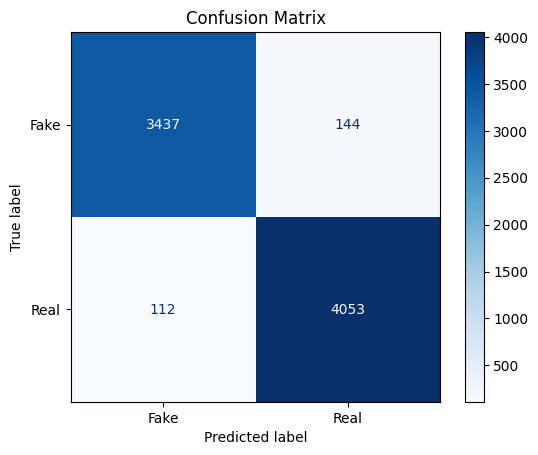

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Предсказания на валидационной выборке
y_pred_probs = model.predict(
    {
        'input_ids': val_input_ids,
        'attention_mask': val_attention_mask
    },
    batch_size=32
)

# 2. Округляем вероятности в классы (0 или 1)
y_pred = (y_pred_probs.flatten() > 0.5).astype(int)

# 3. Выводим отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))

# 4. Матрица ошибок
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
loss, acc = model.evaluate(
    {
        'input_ids': val_input_ids,
        'attention_mask': val_attention_mask
    },
    y_val
)
print(f"Test Accuracy: {acc:.4f}")

243/243 ━━━━━━━━━━━━━━━━━━━━ 27s 111ms/step - accuracy: 0.9640 - loss: 0.1006
Test Accuracy: 0.9670


In [ ]:
from tensorflow.keras.optimizers import AdamW

max_len = 64
def load_tokenized(load_path="tokenized_data.npz"):
    data = np.load(load_path)
    input_ids = tf.convert_to_tensor(data['input_ids'])
    attention_mask = tf.convert_to_tensor(data['attention_mask'])
    labels = data['labels']
    print(f"📂 Загружено из файла: {load_path}")
    return input_ids, attention_mask, labels
# 6. Загрузка токенизированных данных (если нужно)
train_input_ids, train_attention_mask, y_train = load_tokenized("train_tokenized.npz")
test_input_ids, test_attention_mask, y_test = load_tokenized("test_tokenized.npz")
val_input_ids, val_attention_mask, y_val = load_tokenized("val_tokenized.npz")

# 7. Построение модели
def build_model(max_len, num_heads=4, ff_dim=256, num_layers=2, dropout=0.1):
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    # Кастомный слой — теперь обходит ошибку с KerasTensor
    x = BertEmbedding()({"input_ids": input_ids, "attention_mask": attention_mask})

    for _ in range(num_layers):
        x = transformer_encoder(x, head_size=64, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model




# 8. Компиляция и обучение модели
model1 = build_model(max_len=max_len)
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)
model1.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 9. Обучение


model1.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=5,
    batch_size=32
)



📂 Загружено из файла: train_tokenized.npz
📂 Загружено из файла: test_tokenized.npz
📂 Загружено из файла: val_tokenized.npz


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 173s 198ms/step - accuracy: 0.8870 - loss: 0.2570 - val_accuracy: 0.9551 - val_loss: 0.1234
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 178s 181ms/step - accuracy: 0.9599 - loss: 0.1035 - val_accuracy: 0.9649 - val_loss: 0.0930
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 180ms/step - accuracy: 0.9653 - loss: 0.0865 - val_accuracy: 0.9684 - val_loss: 0.0877
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 128s 161ms/step - accuracy: 0.9763 - loss: 0.0651 - val_accuracy: 0.9670 - val_loss: 0.0866
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 156s 180ms/step - accuracy: 0.9801 - loss: 0.0579 - val_accuracy: 0.9684 - val_loss: 0.0865


In [ ]:
model.save('/content/drive/My Drive/bert_model.keras')

In [ ]:
model.save("/content/drive/My Drive/NWfake_news_model_fixed.h5")

In [ ]:
# 10. Оценка
#qwerty
loss, acc = model.evaluate(
    {
        'input_ids': val_input_ids,
        'attention_mask': val_attention_mask
    },
    y_val
)
print(f"Test Accuracy: {acc:.4f}")

243/243 ━━━━━━━━━━━━━━━━━━━━ 29s 119ms/step - accuracy: 0.9606 - loss: 0.1046
Test Accuracy: 0.9592


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.optimizers import AdamW

# 1. Загружаем BERT и токенизатор
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# 2. Размораживаем веса BERT для дообучения
bert_model.trainable = True


In [ ]:
def load_tokenized(load_path="tokenized_data.npz"):
    data = np.load(load_path)
    input_ids = tf.convert_to_tensor(data['input_ids'])
    attention_mask = tf.convert_to_tensor(data['attention_mask'])
    labels = data['labels']
    print(f"📂 Загружено из файла: {load_path}")
    return input_ids, attention_mask, labels
# 6. Загрузка токенизированных данных (если нужно)
train_input_ids, train_attention_mask, y_train = load_tokenized("train_tokenized.npz")
test_input_ids, test_attention_mask, y_test = load_tokenized("test_tokenized.npz")
val_input_ids, val_attention_mask, y_val = load_tokenized("val_tokenized.npz")

📂 Загружено из файла: train_tokenized.npz
📂 Загружено из файла: test_tokenized.npz
📂 Загружено из файла: val_tokenized.npz


In [ ]:
from tensorflow.keras.optimizers import AdamW
# 3. Построение модели

def build_bert_classifier(max_len, dropout_rate=0.3):
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    bert_layer = BertEmbedding()
    bert_outputs = bert_layer({"input_ids": input_ids, "attention_mask": attention_mask})

    cls_output = bert_outputs[:, 0, :]  # CLS токен

    x = Dropout(dropout_rate)(cls_output)
    x = Dense(256, activation="relu")(x)
    x = Dropout(dropout_rate)(x)
    final_output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=final_output)
    return model




# 4. Параметры
max_len = 64

# 5. Построение модели
model = build_bert_classifier(max_len=max_len)

# 6. Компиляция модели
total_steps = len(x_train) // 32 * 5  # например, 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=2e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 7. Обучение
model.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=5,
    batch_size=32
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 168ms/step - accuracy: 0.6714 - loss: 0.5855 - val_accuracy: 0.8923 - val_loss: 0.3002
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 131s 162ms/step - accuracy: 0.8615 - loss: 0.3388 - val_accuracy: 0.9060 - val_loss: 0.2487
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 161ms/step - accuracy: 0.8820 - loss: 0.2918 - val_accuracy: 0.9118 - val_loss: 0.2326
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 161ms/step - accuracy: 0.8885 - loss: 0.2723 - val_accuracy: 0.9134 - val_loss: 0.2246
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 118s 163ms/step - accuracy: 0.8922 - loss: 0.2631 - val_accuracy: 0.9139 - val_loss: 0.2218


In [ ]:
from tensorflow.keras.layers import Layer
from transformers import TFBertModel

class BertWrapper(Layer):
    def __init__(self, model_name="bert-base-uncased", **kwargs):
        super().__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained(model_name)
        self.bert.trainable = True  # Полностью разморозим!

    def call(self, inputs):
        outputs = self.bert(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask']
        )
        return outputs.last_hidden_state


In [ ]:
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.models import Model

def build_model(max_len, dropout=0.1):
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

    x = BertWrapper()(inputs={"input_ids": input_ids, "attention_mask": attention_mask})
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

# 6. Сборка модели
model = build_model(max_len)

# 7. Компиляция
total_steps = len(x_train) // 32 * 5  # 5 эпох

lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=2e-5,  # Обычно для полного fine-tuning ставят ниже
    end_learning_rate=1e-7,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=0.01)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8. Обучение
model.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=5,
    batch_size=32
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 173ms/step - accuracy: 0.5756 - loss: 0.6793 - val_accuracy: 0.7769 - val_loss: 0.6025
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 131s 164ms/step - accuracy: 0.7795 - loss: 0.5878 - val_accuracy: 0.8338 - val_loss: 0.5457
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 126s 142ms/step - accuracy: 0.8287 - loss: 0.5400 - val_accuracy: 0.8573 - val_loss: 0.5113
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 158s 164ms/step - accuracy: 0.8510 - loss: 0.5086 - val_accuracy: 0.8646 - val_loss: 0.4923
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 126s 142ms/step - accuracy: 0.8591 - loss: 0.4945 - val_accuracy: 0.8673 - val_loss: 0.4861


In [ ]:
model.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=5,
    batch_size=32
)

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 119s 164ms/step - accuracy: 0.8536 - loss: 0.4915 - val_accuracy: 0.8674 - val_loss: 0.4857
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 126s 141ms/step - accuracy: 0.8622 - loss: 0.4907 - val_accuracy: 0.8675 - val_loss: 0.4854
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 158s 164ms/step - accuracy: 0.8609 - loss: 0.4896 - val_accuracy: 0.8678 - val_loss: 0.4851
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 119s 164ms/step - accuracy: 0.8553 - loss: 0.4914 - val_accuracy: 0.8679 - val_loss: 0.4848
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 164ms/step - accuracy: 0.8574 - loss: 0.4903 - val_accuracy: 0.8679 - val_loss: 0.4845


In [ ]:
from tensorflow.keras.optimizers import AdamW

max_len = 64
def load_tokenized(load_path="tokenized_data.npz"):
    data = np.load(load_path)
    input_ids = tf.convert_to_tensor(data['input_ids'])
    attention_mask = tf.convert_to_tensor(data['attention_mask'])
    labels = data['labels']
    print(f"📂 Загружено из файла: {load_path}")
    return input_ids, attention_mask, labels
# 6. Загрузка токенизированных данных (если нужно)
train_input_ids, train_attention_mask, y_train = load_tokenized("train_tokenized.npz")
test_input_ids, test_attention_mask, y_test = load_tokenized("test_tokenized.npz")
val_input_ids, val_attention_mask, y_val = load_tokenized("val_tokenized.npz")

# 7. Построение модели
def build_model(max_len, num_heads=4, ff_dim=256, num_layers=2, dropout=0.1):
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    # Кастомный слой — теперь обходит ошибку с KerasTensor
    x = BertEmbedding()({"input_ids": input_ids, "attention_mask": attention_mask})

    for _ in range(num_layers):
        x = transformer_encoder(x, head_size=64, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model




# 8. Компиляция и обучение модели
model1 = build_model(max_len=max_len)
total_steps = len(x_train) // 32 * 5  # 5 эпох
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=1e-6,
    decay_steps=total_steps
)
optimizer = AdamW(learning_rate=lr_schedule, weight_decay=1e-4)
model1.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 9. Обучение


model1.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=5,
    batch_size=32
)



📂 Загружено из файла: train_tokenized.npz
📂 Загружено из файла: test_tokenized.npz
📂 Загружено из файла: val_tokenized.npz


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 159s 181ms/step - accuracy: 0.8787 - loss: 0.2616 - val_accuracy: 0.9570 - val_loss: 0.1125
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 189s 177ms/step - accuracy: 0.9600 - loss: 0.1038 - val_accuracy: 0.9637 - val_loss: 0.0940
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 177ms/step - accuracy: 0.9674 - loss: 0.0822 - val_accuracy: 0.9668 - val_loss: 0.0874
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 142s 177ms/step - accuracy: 0.9773 - loss: 0.0617 - val_accuracy: 0.9704 - val_loss: 0.0846
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 129s 177ms/step - accuracy: 0.9816 - loss: 0.0507 - val_accuracy: 0.9690 - val_loss: 0.0867


это для около bert

243/243 ━━━━━━━━━━━━━━━━━━━━ 37s 139ms/step
              precision    recall  f1-score   support

           0     0.9658    0.9615    0.9636      3581
           1     0.9670    0.9707    0.9688      4165

    accuracy                         0.9664      7746
   macro avg     0.9664    0.9661    0.9662      7746
weighted avg     0.9664    0.9664    0.9664      7746



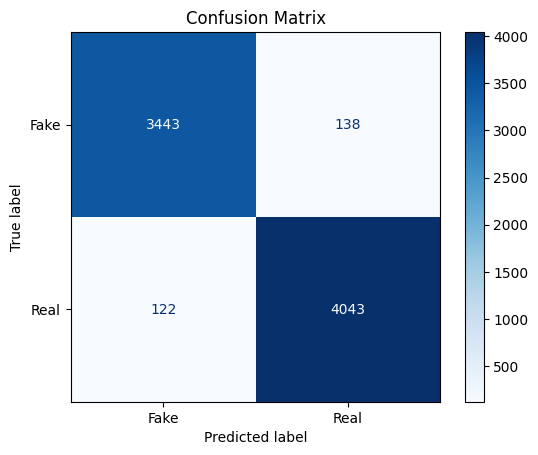

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Предсказания на валидационной выборке
y_pred_probs = model.predict(
    {
        'input_ids': val_input_ids,
        'attention_mask': val_attention_mask
    },
    batch_size=32
)

# 2. Округляем вероятности в классы (0 или 1)
y_pred = (y_pred_probs.flatten() > 0.5).astype(int)

# 3. Выводим отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))

# 4. Матрица ошибок
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


243/243 ━━━━━━━━━━━━━━━━━━━━ 36s 133ms/step
              precision    recall  f1-score   support

           0     0.9618    0.9631    0.9625      3581
           1     0.9683    0.9671    0.9677      4165

    accuracy                         0.9653      7746
   macro avg     0.9650    0.9651    0.9651      7746
weighted avg     0.9653    0.9653    0.9653      7746



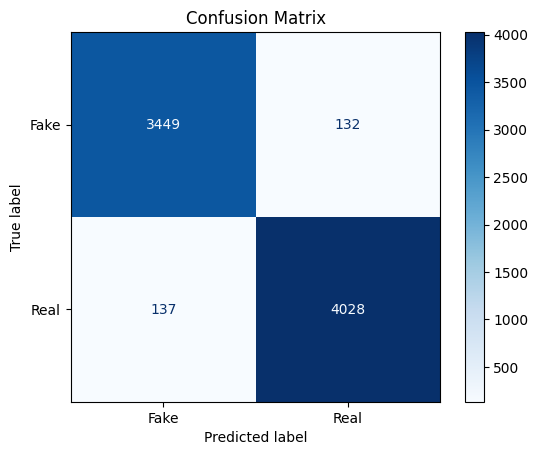

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Предсказания на валидационной выборке
y_pred_probs = model1.predict(
    {
        'input_ids': val_input_ids,
        'attention_mask': val_attention_mask
    },
    batch_size=32
)

# 2. Округляем вероятности в классы (0 или 1)
y_pred = (y_pred_probs.flatten() > 0.5).astype(int)

# 3. Выводим отчет по метрикам
print(classification_report(y_val, y_pred, digits=4))

# 4. Матрица ошибок
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.fit(
    x={
        'input_ids': train_input_ids,
        'attention_mask': train_attention_mask
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_input_ids,
            'attention_mask': test_attention_mask
        },
        y_test
    ),
    epochs=3,
    batch_size=32
)


Epoch 1/3
727/727 ━━━━━━━━━━━━━━━━━━━━ 133s 183ms/step - accuracy: 0.9676 - loss: 0.0881 - val_accuracy: 0.9657 - val_loss: 0.0877
Epoch 2/3
180/727 ━━━━━━━━━━━━━━━━━━━━ 1:10 129ms/step - accuracy: 0.9648 - loss: 0.0872

In [ ]:
import pandas as pd

# Создаём DataFrame
df = pd.DataFrame({
    "text": ["Здравствуйте"],
    "label": [1]
})

# Сохраняем в CSV
df.to_csv("example.csv", index=False, encoding="utf-8-sig")

print("✅ Файл 'example.csv' создан.")


✅ Файл 'example.csv' создан.


In [ ]:
df.iloc[0].text=tt['text'].iloc[0]

NameError: name 'tt' is not defined

In [ ]:
df

,text,label
0,Здравствуйте,1


In [ ]:

tt

,text,label
0,South Korea established diplomatic relations w...,NaN


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer, Input, Dense, Dropout, GlobalAveragePooling1D, MultiHeadAttention, LayerNormalization
from transformers import TFBertModel
import numpy as np
# Кастомный слой с BERT
@tf.keras.utils.register_keras_serializable()
class BertEmbedding(Layer):
    def __init__(self, model_name="bert-base-uncased", **kwargs):
        super().__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained(model_name)

    def call(self, inputs):
        return self.bert(inputs).last_hidden_state

# Кастомный encoder блок
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)  # residual

    y = Dense(ff_dim, activation="gelu")(x)
    y = Dense(inputs.shape[-1])(y)
    y = Dropout(dropout)(y)
    return LayerNormalization(epsilon=1e-6)(x + y)

model = load_model(
    '/content/drive/My Drive/bert_model.keras',
    custom_objects={
        'BertEmbedding': BertEmbedding,
        'transformer_encoder': transformer_encoder
    }
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
model.save("/content/drive/My Drive/final_model.keras")

In [ ]:
model.save('/content/drive/My Drive/newfinal_model.keras', save_format='keras')

In [ ]:
def tokenize(texts, labels, tokenizer, max_len):
    input_ids = []
    attention_masks = []

    for text in texts:
        tokens = tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=max_len,
            return_tensors='np'  # ⬅️ вместо 'tf'
        )
        input_ids.append(tokens['input_ids'][0])
        attention_masks.append(tokens['attention_mask'][0])

    input_ids = np.stack(input_ids)
    attention_masks = np.stack(attention_masks)
    labels = np.array(labels)

    return input_ids, attention_masks, labels



In [ ]:
tt=pd.read_csv("t2.csv")
tt

,text,label
0,"MOSCOW, April 13. /TASS/. Russia and China cou...",0


In [ ]:

test_input_ids, test_attention_mask, y_test = tokenize(tt['text'].tolist(), tt['label'].tolist(), tokenizer, max_len=512)
loss, acc = model.evaluate(
    x={
        'input_ids': test_input_ids,
        'attention_mask': test_attention_mask
    },
    y=y_test
)
print(f"✅ Accuracy: {acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.0000e+00 - loss: 2.0328
✅ Accuracy: 0.0000


In [ ]:
max_len = 512
def load_tokenized(load_path="tokenized_data.npz"):
    data = np.load(load_path)
    input_ids = tf.convert_to_tensor(data['input_ids'])
    attention_mask = tf.convert_to_tensor(data['attention_mask'])
    labels = data['labels']
    print(f"📂 Загружено из файла: {load_path}")
    return input_ids, attention_mask, labels
test_input_ids, test_attention_mask, y_test = load_tokenized("/content/drive/My Drive/test_tokenized.npz")
loss, acc = model.evaluate(
    x={
        'input_ids': test_input_ids,
        'attention_mask': test_attention_mask
    },
    y=y_test
)
print(f"✅ Accuracy: {acc:.4f}")

📂 Загружено из файла: /content/drive/My Drive/test_tokenized.npz
302/302 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.9998 - loss: 8.9655e-04
✅ Accuracy: 0.9999
